In [378]:
###### Start of import packages ######
import sys
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from statistics import mean, stdev
from sklearn import linear_model
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import cm as cm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb


pd.set_option('display.max_rows', 100)
###### To ignore warnings ######
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

###### End of import packages ######

sns.set()


In [379]:
dataset = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [380]:
dataset.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [381]:
# Remove Nulls
# dataset.dropna(axis=1,inplace=True)
dataset.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
              'Fence', 'MiscFeature', 'GarageType', 'GarageFinish'], axis=1, inplace=True)
# for x in range(0, dataset.shape[1]):
#     col = dataset.columns[x]
#     if (dataset[col].dtype == object):
#         dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
#     else:
#         dataset[col] = dataset[col].fillna(dataset[col].mean())
for i, column in enumerate(dataset):
    if (dataset[column].dtype == object):
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
    else:
        dataset[column] = dataset[column].fillna(dataset[column].mean())


In [382]:
# Drop Highly Correlated
dataset.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
              'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)


In [383]:
# Drop Low Correlated
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
         "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
         "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
         "YrSold"]
dataset = dataset.drop(drops, axis=1)


In [384]:
# Drop outliers
# dataset = dataset[(dataset['LotArea'] < 60000)]
# dataset = dataset[(dataset['BsmtFinSF1'] < 2300)]
# dataset = dataset[(dataset['TotalBsmtSF'] < 2100)]
# dataset = dataset[(dataset['GrLivArea'] < 4600)]
# dataset = dataset[(dataset['OpenPorchSF'] < 380)]


In [385]:
# Drop Not Important
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
         "GarageQual", "GarageCond", "PavedDrive",
         "PoolArea"]
dataset = dataset.drop(drops, axis=1)


In [386]:
dataset


,Id,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,Y,854,1710,1,2,1,3,1,Gd,0,548,0,61,0,0,WD,Normal,208500
1,2,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,Y,0,1262,0,2,0,3,1,TA,1,460,298,0,0,0,WD,Normal,181500
2,3,RL,11250,IR1,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,Y,866,1786,1,2,1,3,1,Gd,1,608,0,42,0,0,WD,Normal,223500
3,4,RL,9550,IR1,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,Y,756,1717,1,1,0,3,1,Gd,1,642,0,35,272,0,WD,Abnorml,140000
4,5,RL,14260,IR1,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,Y,1053,2198,1,2,1,4,1,Gd,1,836,192,84,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,7917,Reg,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,0.0,TA,TA,PConc,Gd,No,Unf,0,953,953,Ex,Y,694,1647,0,2,1,3,1,TA,1,460,0,40,0,0,WD,Normal,175000
1456,1457,RL,13175,Reg,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,119.0,TA,TA,CBlock,Gd,No,ALQ,790,589,1542,TA,Y,0,2073,1,2,0,3,1,TA,2,500,349,0,0,0,WD,Normal,210000
1457,1458,RL,9042,Reg,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,0.0,Ex,Gd,Stone,TA,No,GLQ,275,877,1152,Ex,Y,1152,2340,0,2,0,4,1,Gd,2,252,0,60,0,0,WD,Normal,266500
1458,1459,RL,9717,Reg,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,0.0,TA,TA,CBlock,TA,Mn,GLQ,49,0,1078,Gd,Y,0,1078,1,1,0,2,1,Gd,0,240,366,0,112,0,WD,Normal,142125


In [387]:
# # Plots
# def chunks(l, n):
#     return [l[i:i + n] for i in range(0, len(l), n)]


# cols = dataset.columns
# for x in chunks(cols, 5):
#     sns.pairplot(dataset, y_vars=x, x_vars=x)

In [388]:
# Drop more outliers
dataset = dataset[(dataset['LotArea'] < 20000)]
dataset = dataset[(dataset['OverallQual'] > 2.5)]
dataset = dataset[(dataset['OverallCond'] > 2.5)]
dataset = dataset.loc[(dataset['RoofStyle']=='Gable') | (dataset['RoofStyle']=='Hip')]
dataset = dataset.loc[(dataset['ExterQual']=='Gd') | (dataset['ExterQual']=='TA')]
dataset = dataset.loc[(dataset['ExterCond']=='TA') | (dataset['ExterCond']=='Gd')]
dataset = dataset.loc[(dataset['Foundation']=='PConc') | (dataset['Foundation']=='CBlock') | (dataset['Foundation']=='BrkTil')]
# Graphs show majority of basements are less than 1600
dataset = dataset[(dataset['BsmtFinSF1'] < 1600)]
dataset = dataset[(dataset['TotalBsmtSF'] < 2100)]
dataset = dataset[(dataset['GrLivArea'] < 3000)]
dataset = dataset[(dataset['BsmtFullBath'] < 2)]
dataset = dataset[(dataset['FullBath'] < 3) & (dataset['FullBath']>0)]
dataset = dataset[(dataset['HalfBath'] < 2)]
dataset = dataset[(dataset['OpenPorchSF'] < 380)]


In [389]:
pd.set_option('display.max_columns', None)
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,Y,854,1710,1,2,1,3,1,Gd,0,548,0,61,0,0,WD,Normal,208500
1,2,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,Y,0,1262,0,2,0,3,1,TA,1,460,298,0,0,0,WD,Normal,181500
2,3,RL,11250,IR1,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,Y,866,1786,1,2,1,3,1,Gd,1,608,0,42,0,0,WD,Normal,223500
3,4,RL,9550,IR1,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,Y,756,1717,1,1,0,3,1,Gd,1,642,0,35,272,0,WD,Abnorml,140000
4,5,RL,14260,IR1,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,Y,1053,2198,1,2,1,4,1,Gd,1,836,192,84,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,FV,7500,Reg,Somerst,Norm,1Fam,1Story,7,5,2004,2005,Gable,VinylSd,0.0,Gd,TA,PConc,Gd,No,GLQ,410,811,1221,Ex,Y,0,1221,1,2,0,2,1,Gd,0,400,0,113,0,0,WD,Normal,185000
1455,1456,RL,7917,Reg,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,0.0,TA,TA,PConc,Gd,No,Unf,0,953,953,Ex,Y,694,1647,0,2,1,3,1,TA,1,460,0,40,0,0,WD,Normal,175000
1456,1457,RL,13175,Reg,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,119.0,TA,TA,CBlock,Gd,No,ALQ,790,589,1542,TA,Y,0,2073,1,2,0,3,1,TA,2,500,349,0,0,0,WD,Normal,210000
1458,1459,RL,9717,Reg,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,0.0,TA,TA,CBlock,TA,Mn,GLQ,49,0,1078,Gd,Y,0,1078,1,1,0,2,1,Gd,0,240,366,0,112,0,WD,Normal,142125


In [390]:
# Transform to Object

# for x in range(0, dataset.shape[1]):
#     if (dataset[dataset.columns[x]].dtype == object):
#         le = preprocessing.LabelEncoder()
#         le.fit(dataset[dataset.columns[x]])
#         dataset[dataset.columns[x]] = le.transform(dataset[dataset.columns[x]])
dataset = pd.get_dummies(dataset)


In [391]:
# Conversion to binary columns
dataset['EnclosedPorch'] = dataset['EnclosedPorch'].apply(lambda x: 1 if x>0 else 0)
dataset['ScreenPorch'] = dataset['ScreenPorch'].apply(lambda x: 1 if x>0 else 0)

In [392]:
dataset

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,706,150,856,854,1710,1,2,1,3,1,0,548,0,61,0,0,208500,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,978,284,1262,0,1262,0,2,0,3,1,1,460,298,0,0,0,181500,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,486,434,920,866,1786,1,2,1,3,1,1,608,0,42,0,0,223500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,216,540,756,756,1717,1,1,0,3,1,1,642,0,35,1,0,140000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655,490,1145,1053,2198,1,2,1,4,1,1,836,192,84,0,0,250000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [393]:
# Scale Price
# dataset = np.log1p(dataset)
# dataset.SalePrice = np.log1p(dataset.SalePrice)


In [394]:
# # plot_features_to_SalePrice
# def chunks(l, n):
#     return [l[i:i + n] for i in range(0, len(l), n)]


# cols = dataset.columns
# for x in chunks(cols, 5):
#     sns.pairplot(dataset, y_vars=['SalePrice'], x_vars=x)


In [395]:
# Scale Data

dataset['LotArea'] = np.log1p(dataset['LotArea'])
dataset.MasVnrArea = np.log1p(dataset.MasVnrArea)
dataset.BsmtFinSF1 = np.log1p(dataset.BsmtFinSF1)
dataset.BsmtUnfSF = np.log1p(dataset.BsmtUnfSF)
dataset.TotalBsmtSF = np.log1p(dataset.TotalBsmtSF)
dataset['2ndFlrSF'] = np.log1p(dataset['2ndFlrSF'])
dataset.GrLivArea = np.log1p(dataset.GrLivArea)
dataset.GarageArea = np.log1p(dataset.GarageArea)
dataset.WoodDeckSF = np.log1p(dataset.WoodDeckSF)
dataset.OpenPorchSF = np.log1p(dataset.OpenPorchSF)
dataset.SalePrice = np.log1p(dataset.SalePrice)
# dataset.LotArea = np.log1p(dataset.LotArea)



# dataset = np.log1p(dataset.iloc[:, ~dataset.columns.isin(['Id'])])


In [396]:
pd.set_option('display.max_columns', None)
dataset


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,9.042040,7,5,2003,2003,5.283204,6.561031,5.017280,6.753438,6.751101,7.444833,1,2,1,3,1,0,6.308098,0.000000,4.127134,0,0,12.247699,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,9.169623,6,8,1976,1976,0.000000,6.886532,5.652489,7.141245,0.000000,7.141245,0,2,0,3,1,1,6.133398,5.700444,0.000000,0,0,12.109016,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,9.328212,7,5,2001,2002,5.093750,6.188264,6.075346,6.825460,6.765039,7.488294,1,2,1,3,1,1,6.411818,0.000000,3.761200,0,0,12.317171,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,9.164401,7,5,1915,1970,0.000000,5.379897,6.293419,6.629363,6.629363,7.448916,1,1,0,3,1,1,6.466145,0.000000,3.583519,1,0,11.849405,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,9.565284,8,5,2000,2000,5.860786,6.486161,6.196444,7.044033,6.960348,7.695758,1,2,1,4,1,1,6.729824,5.262690,4.442651,0,0,12.429220,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0

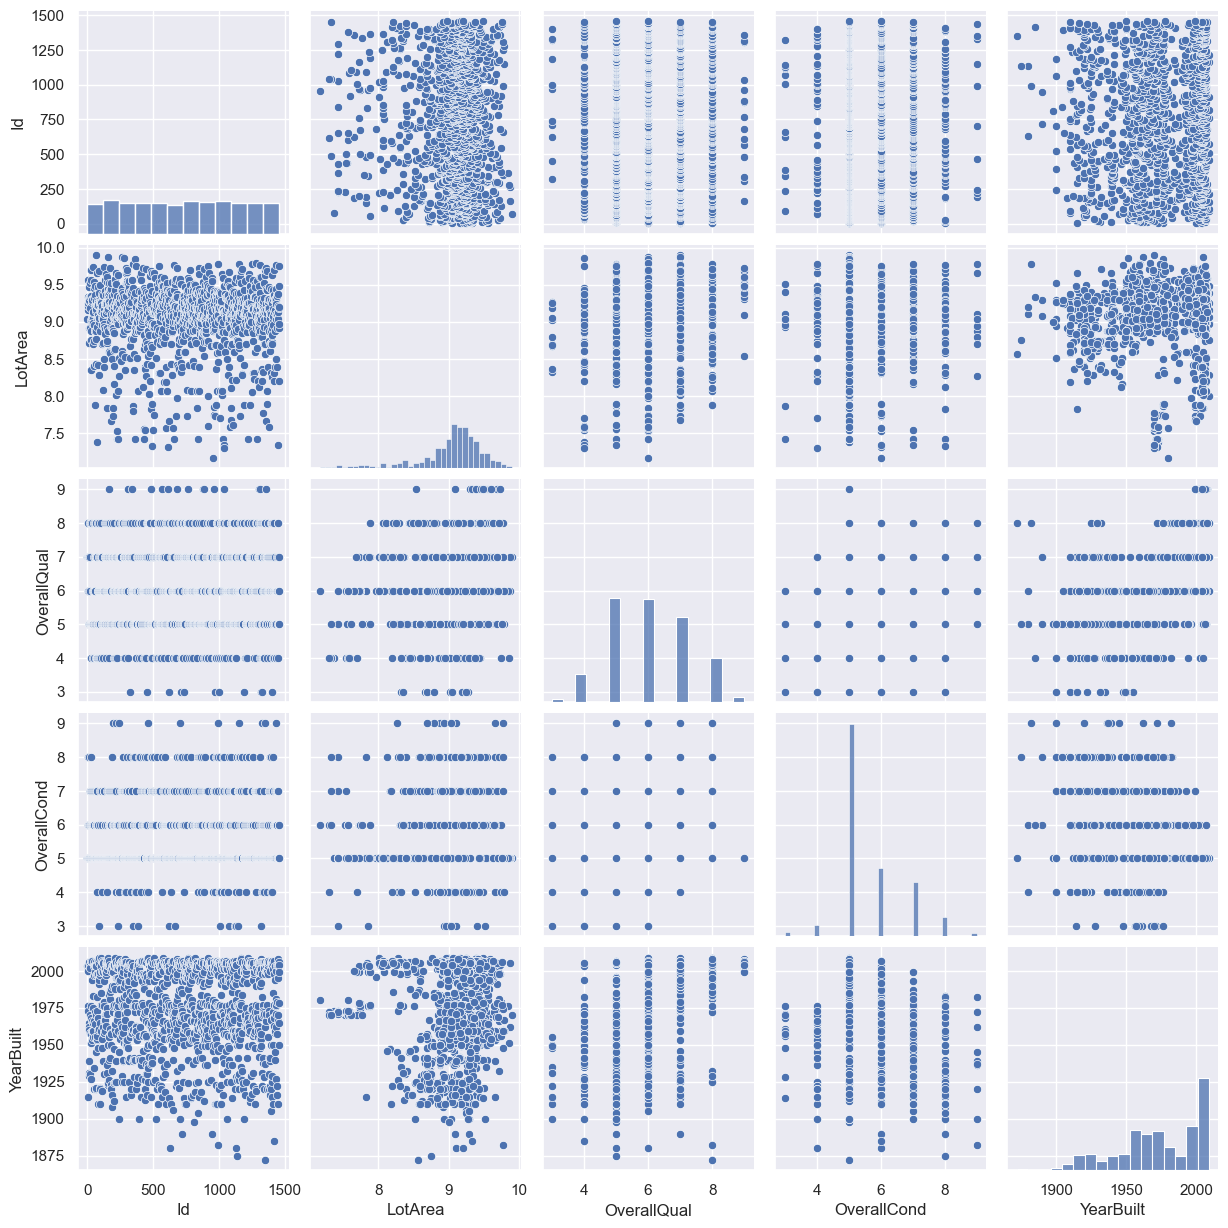

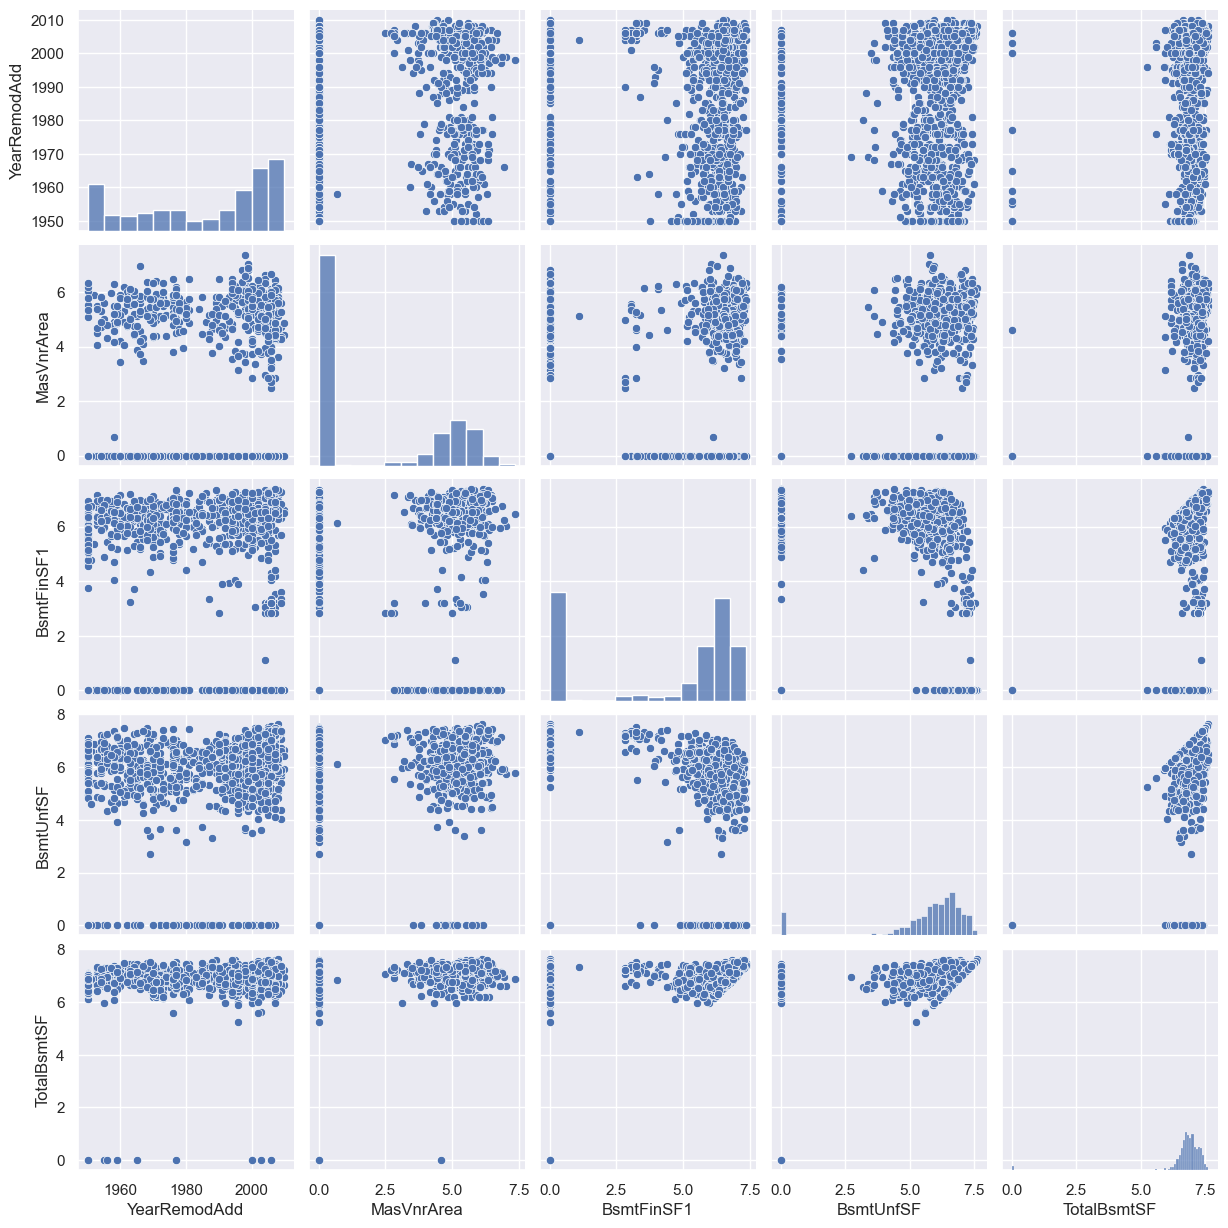

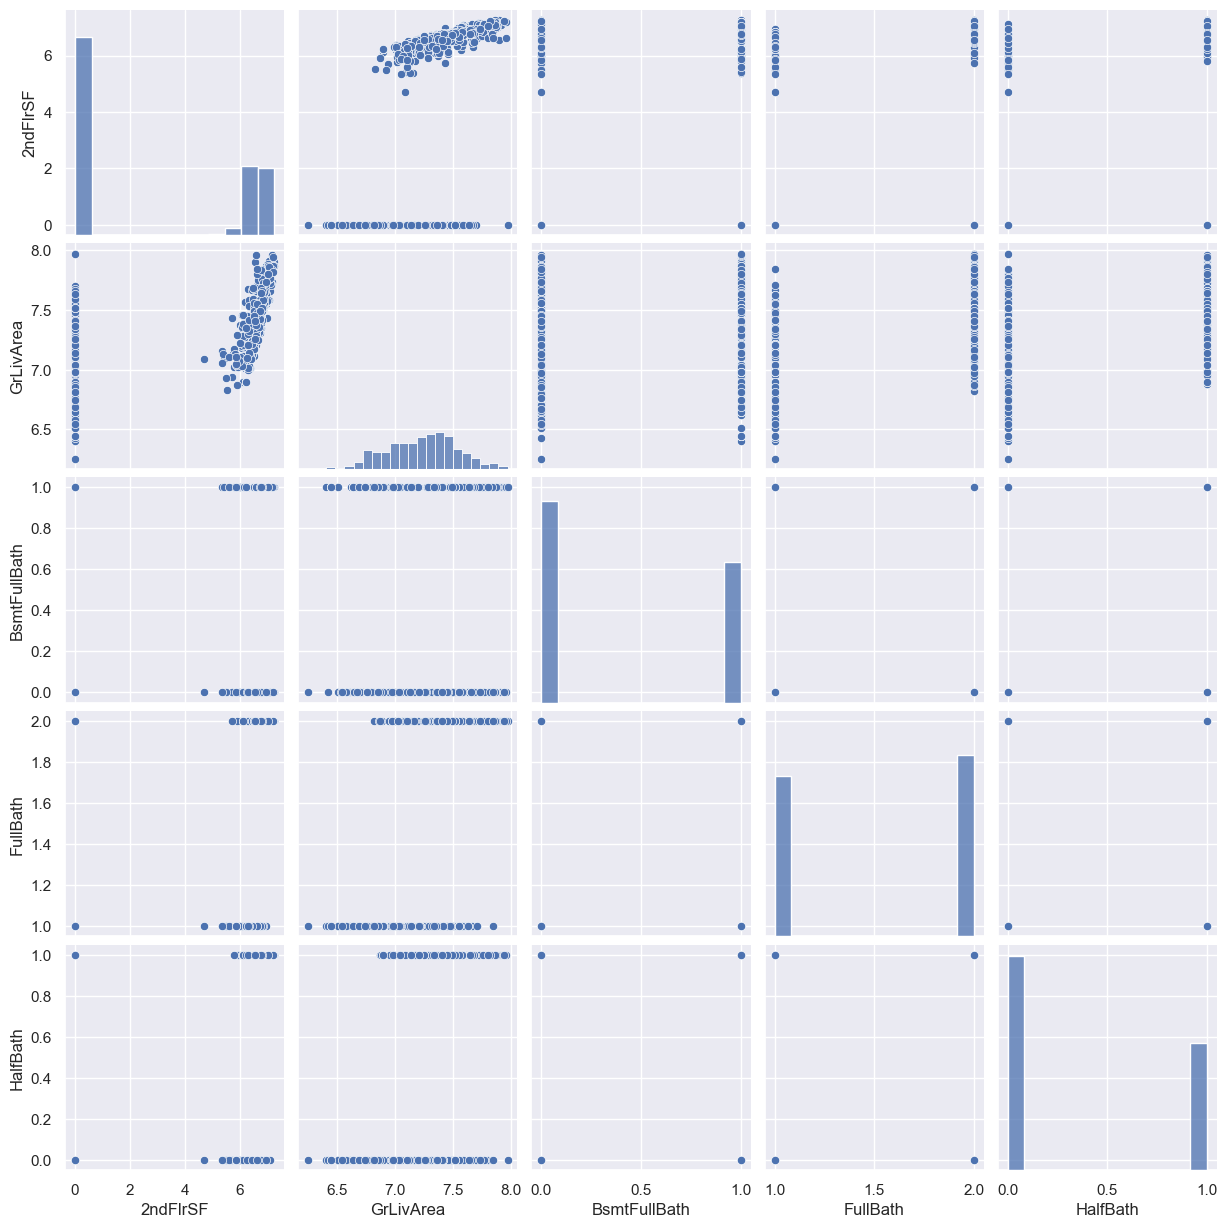

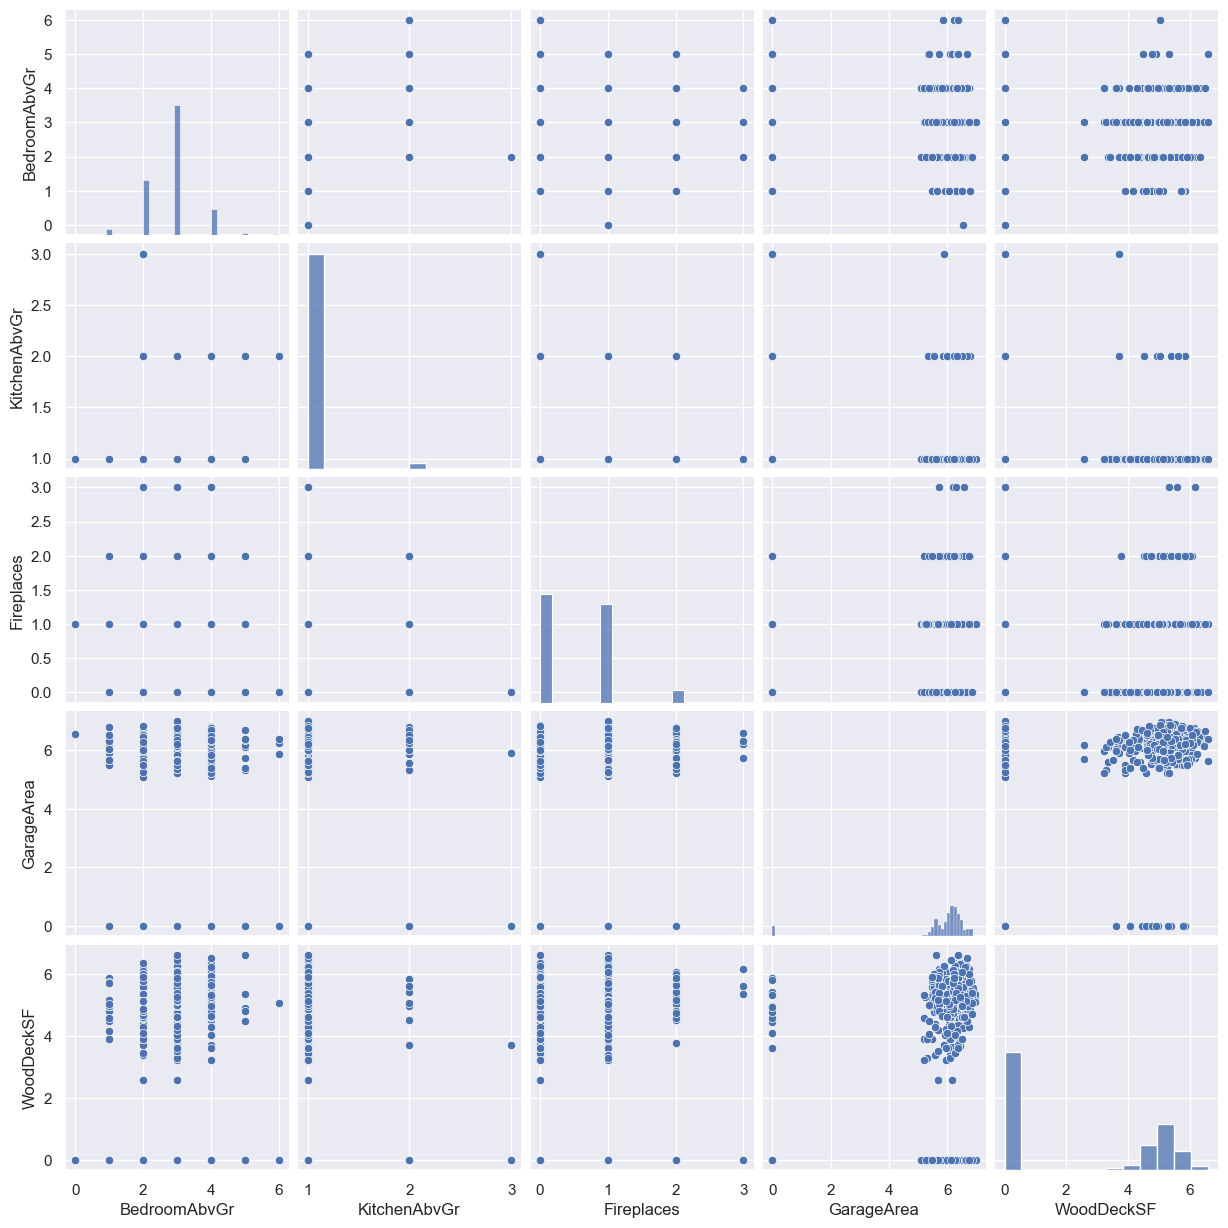

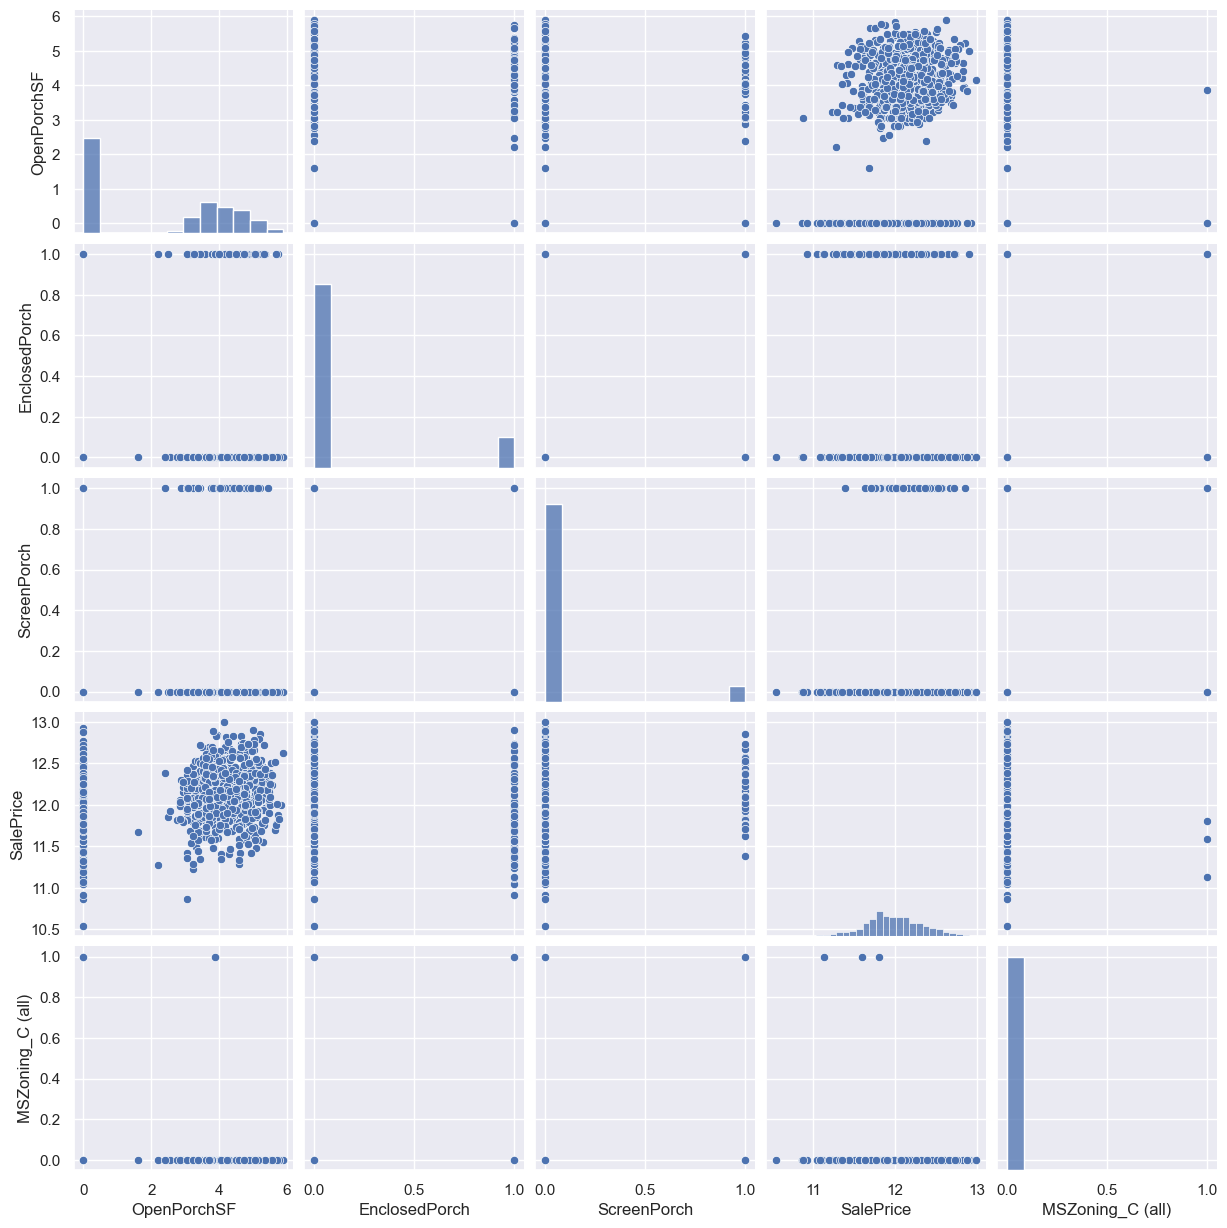

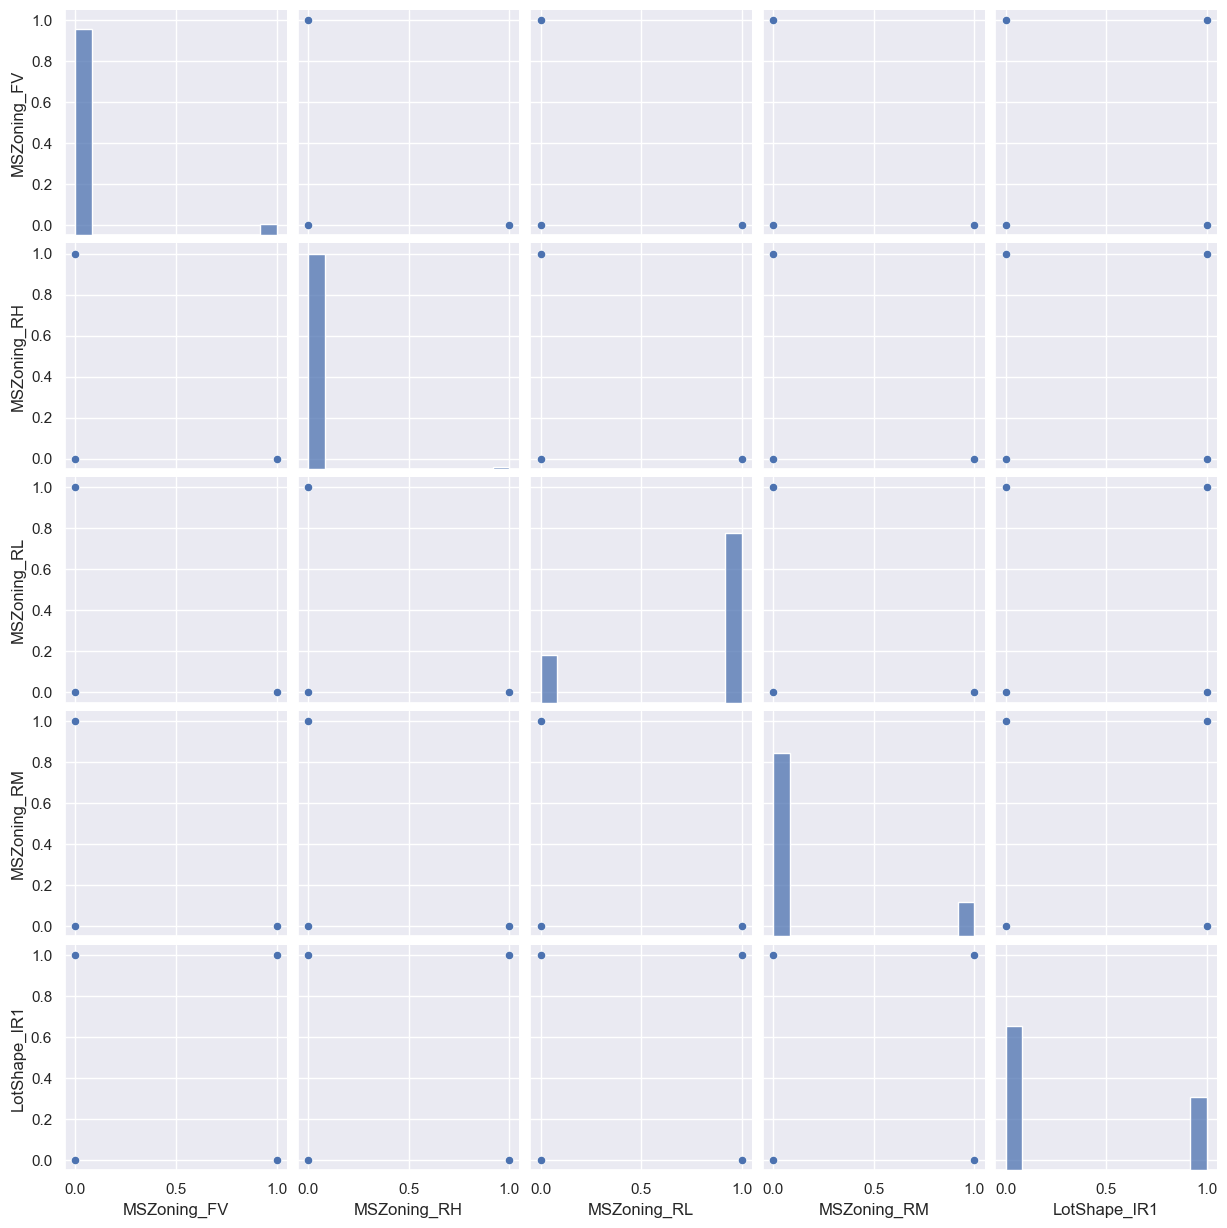

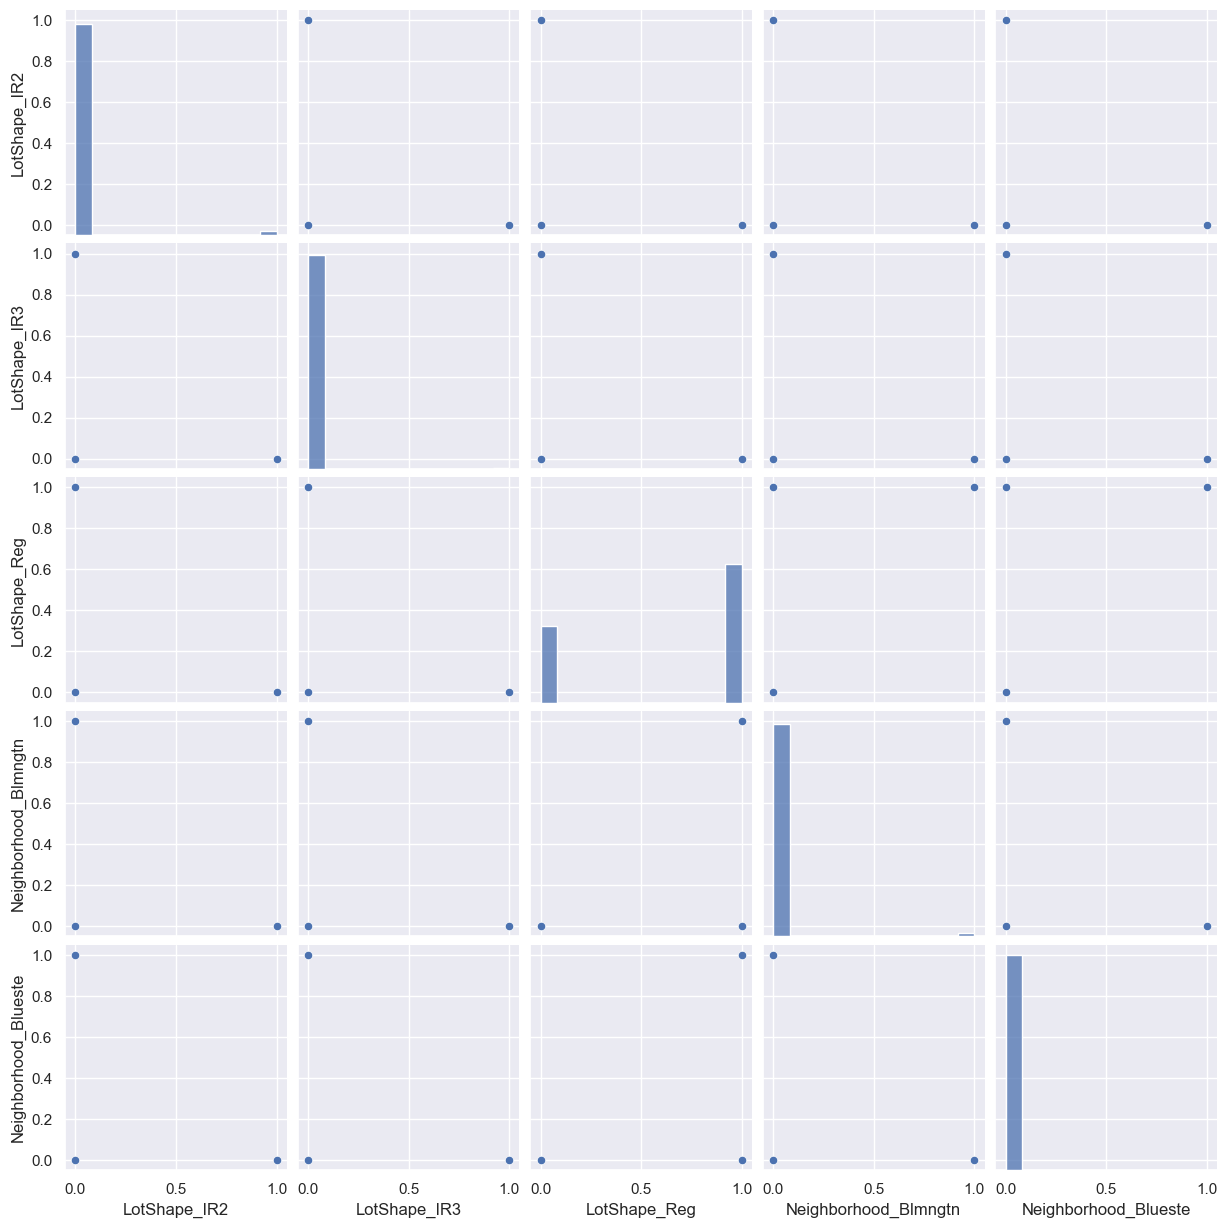

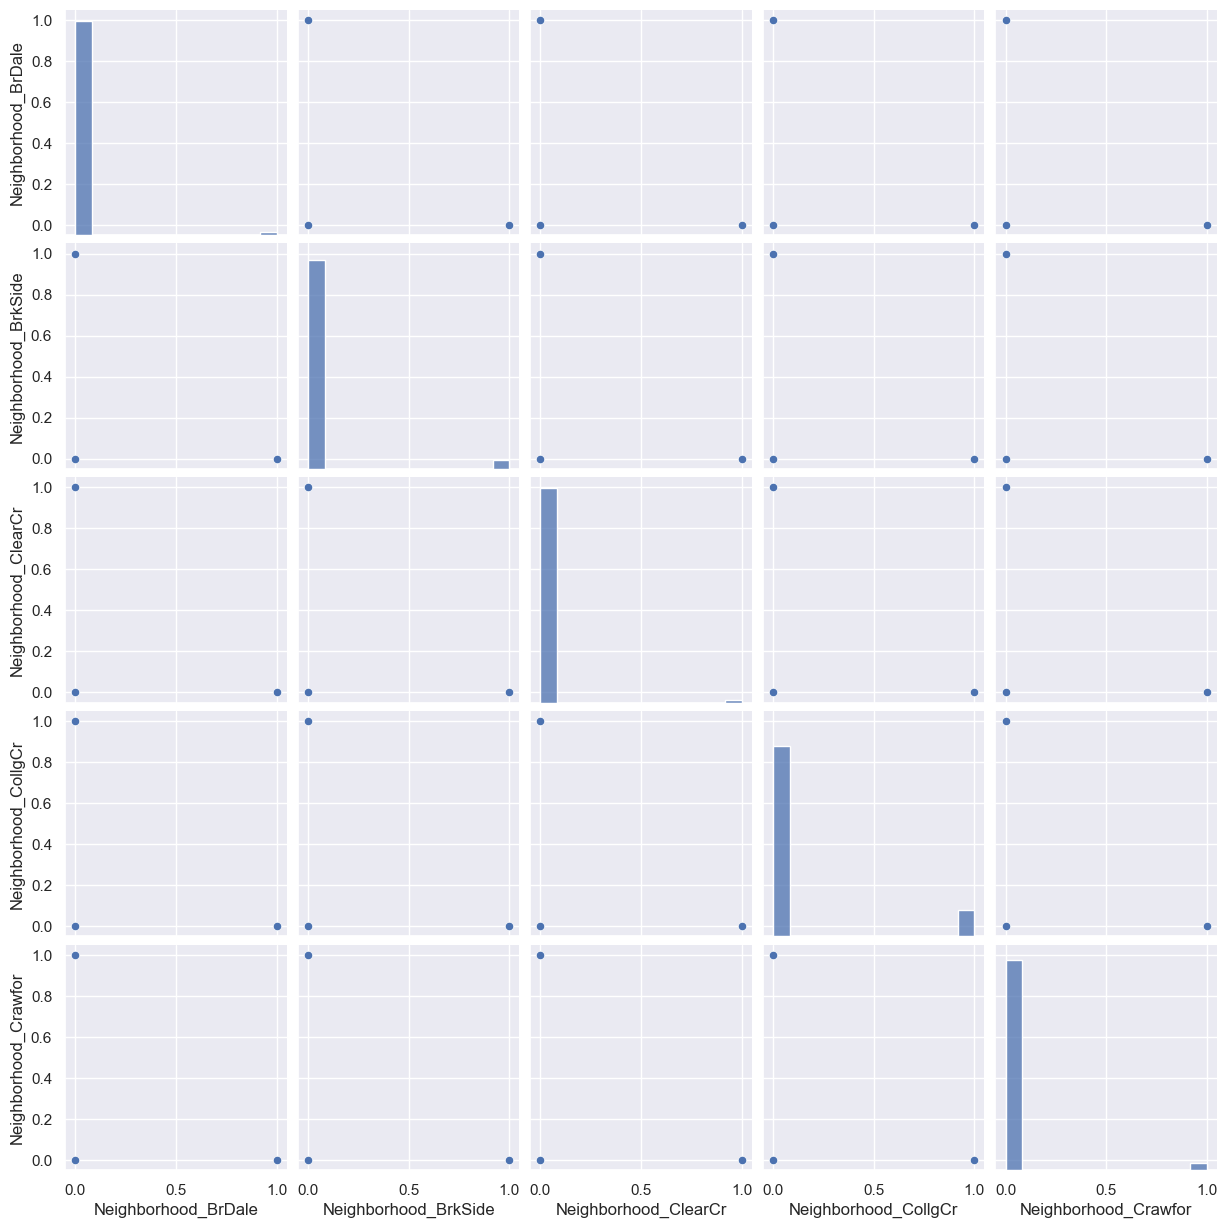

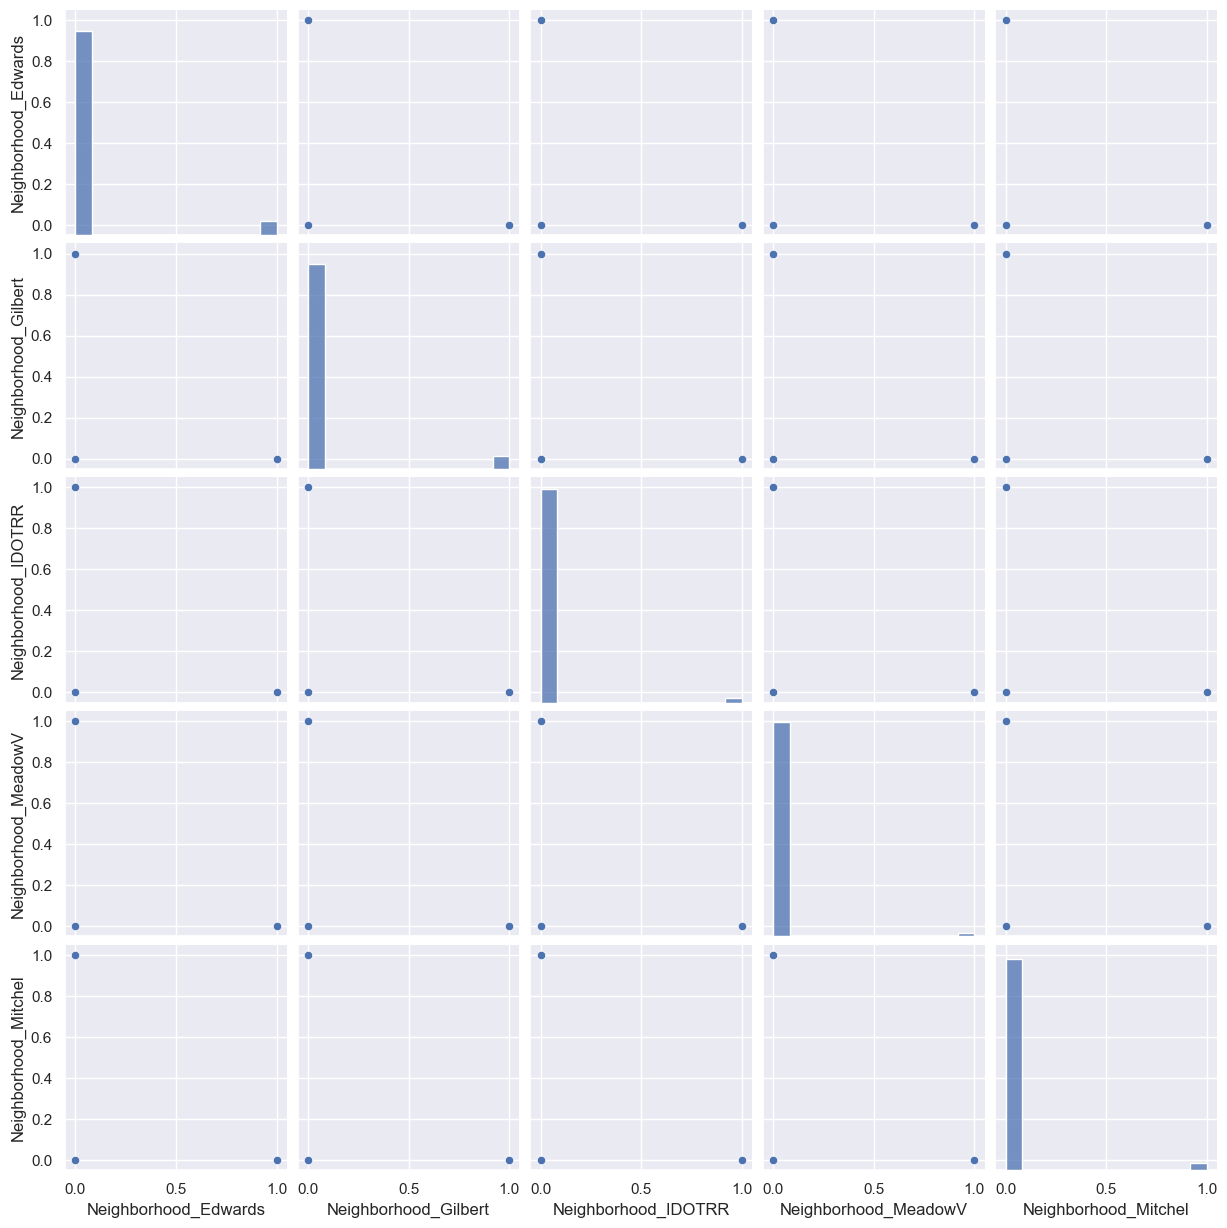

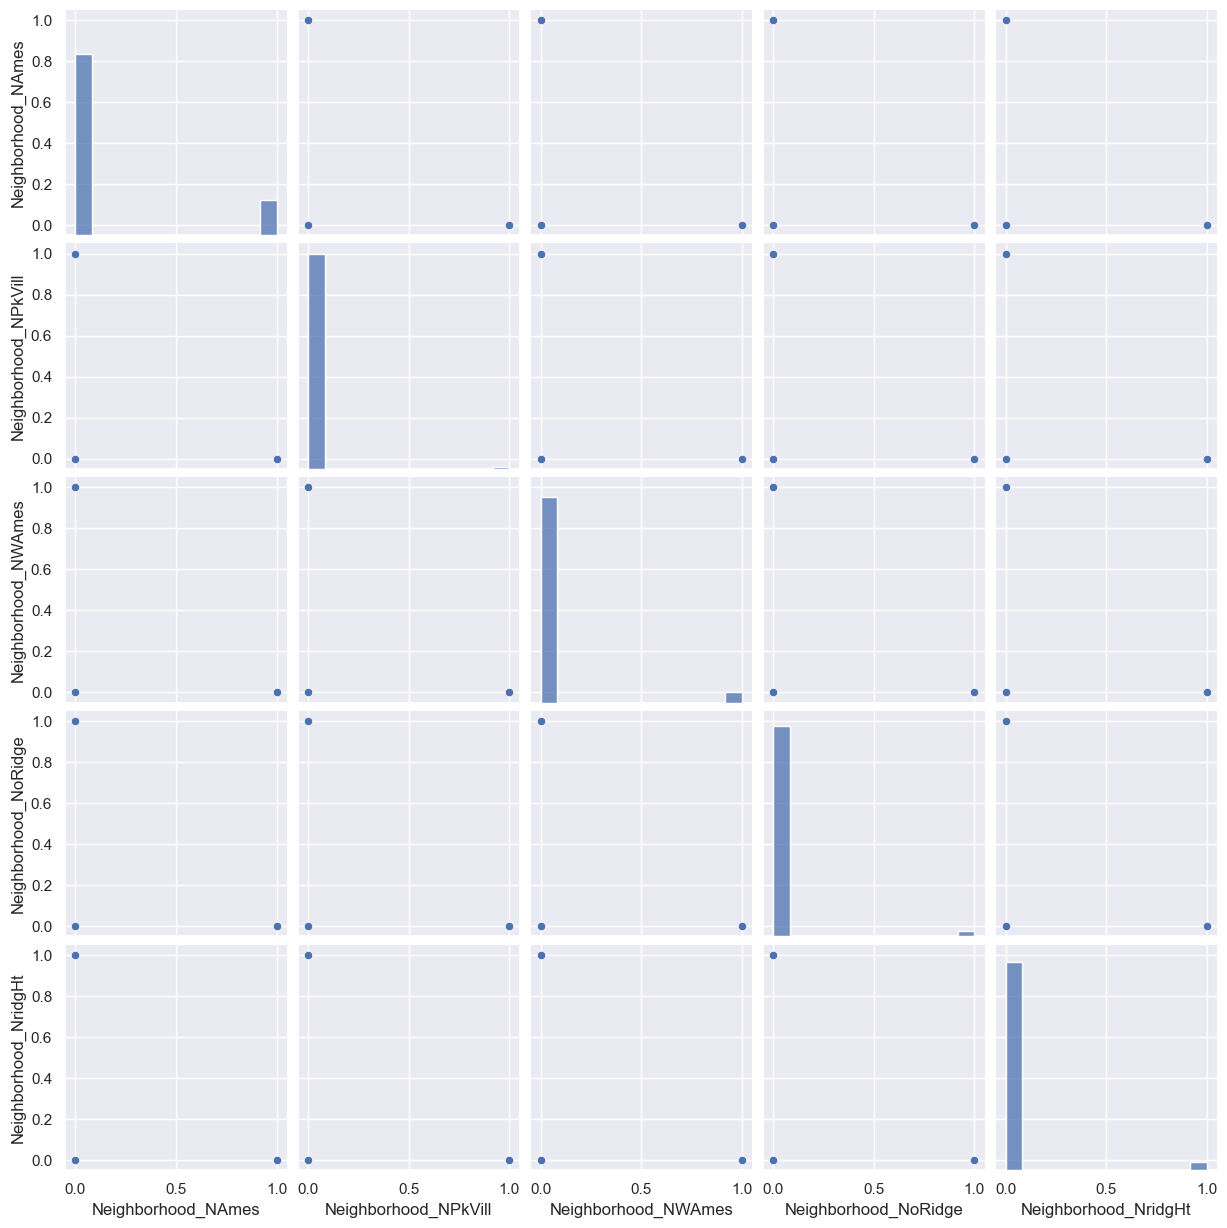

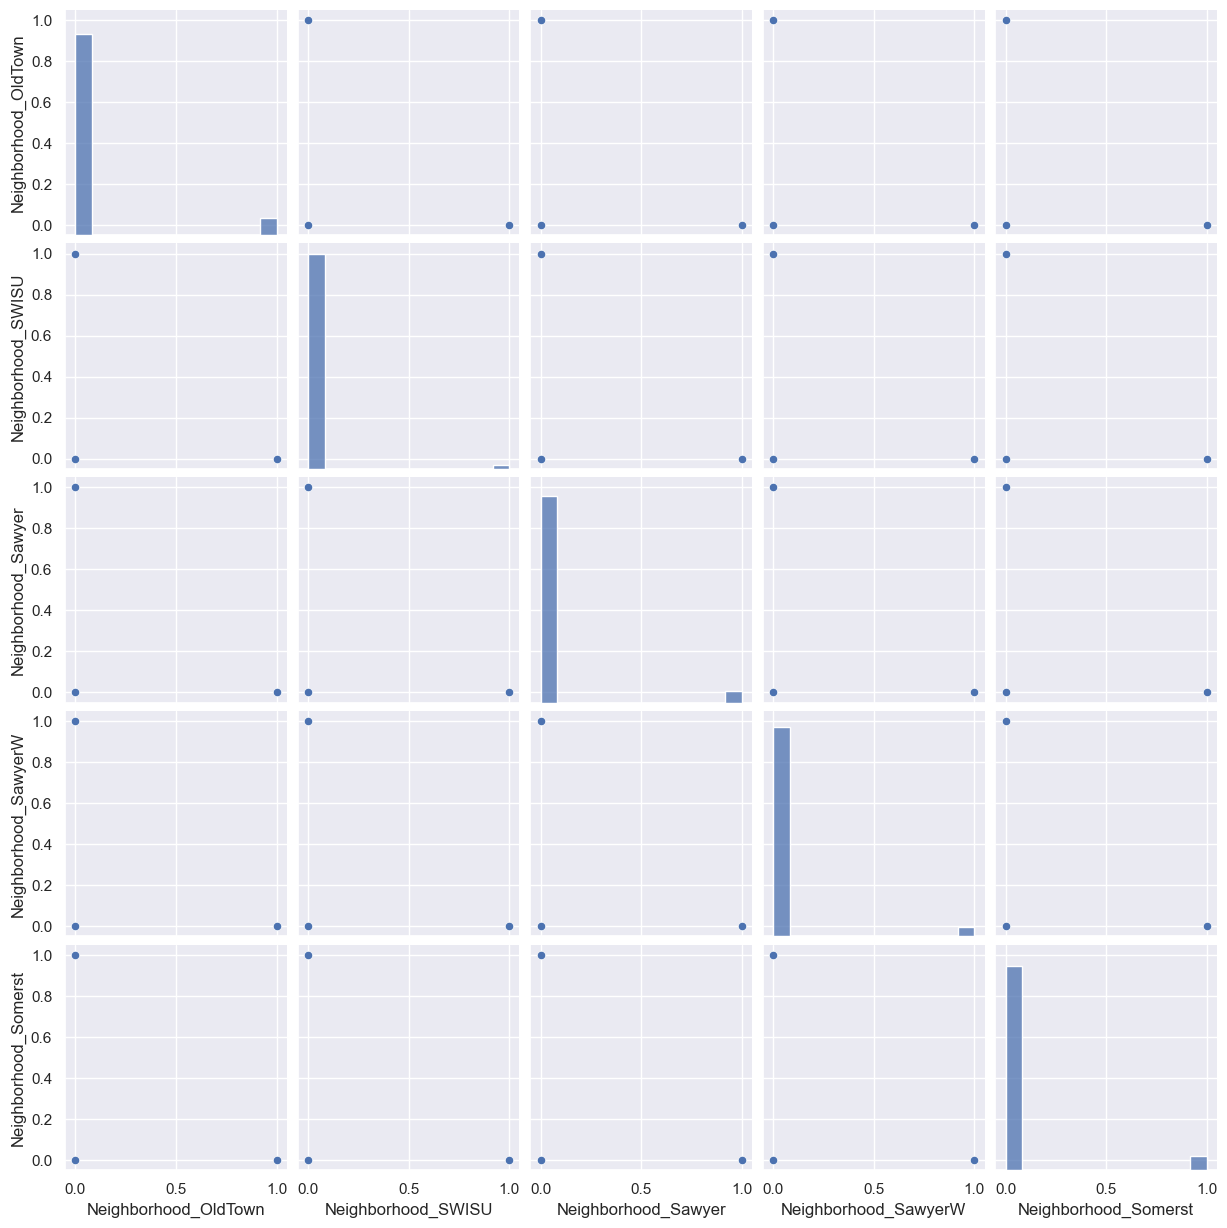

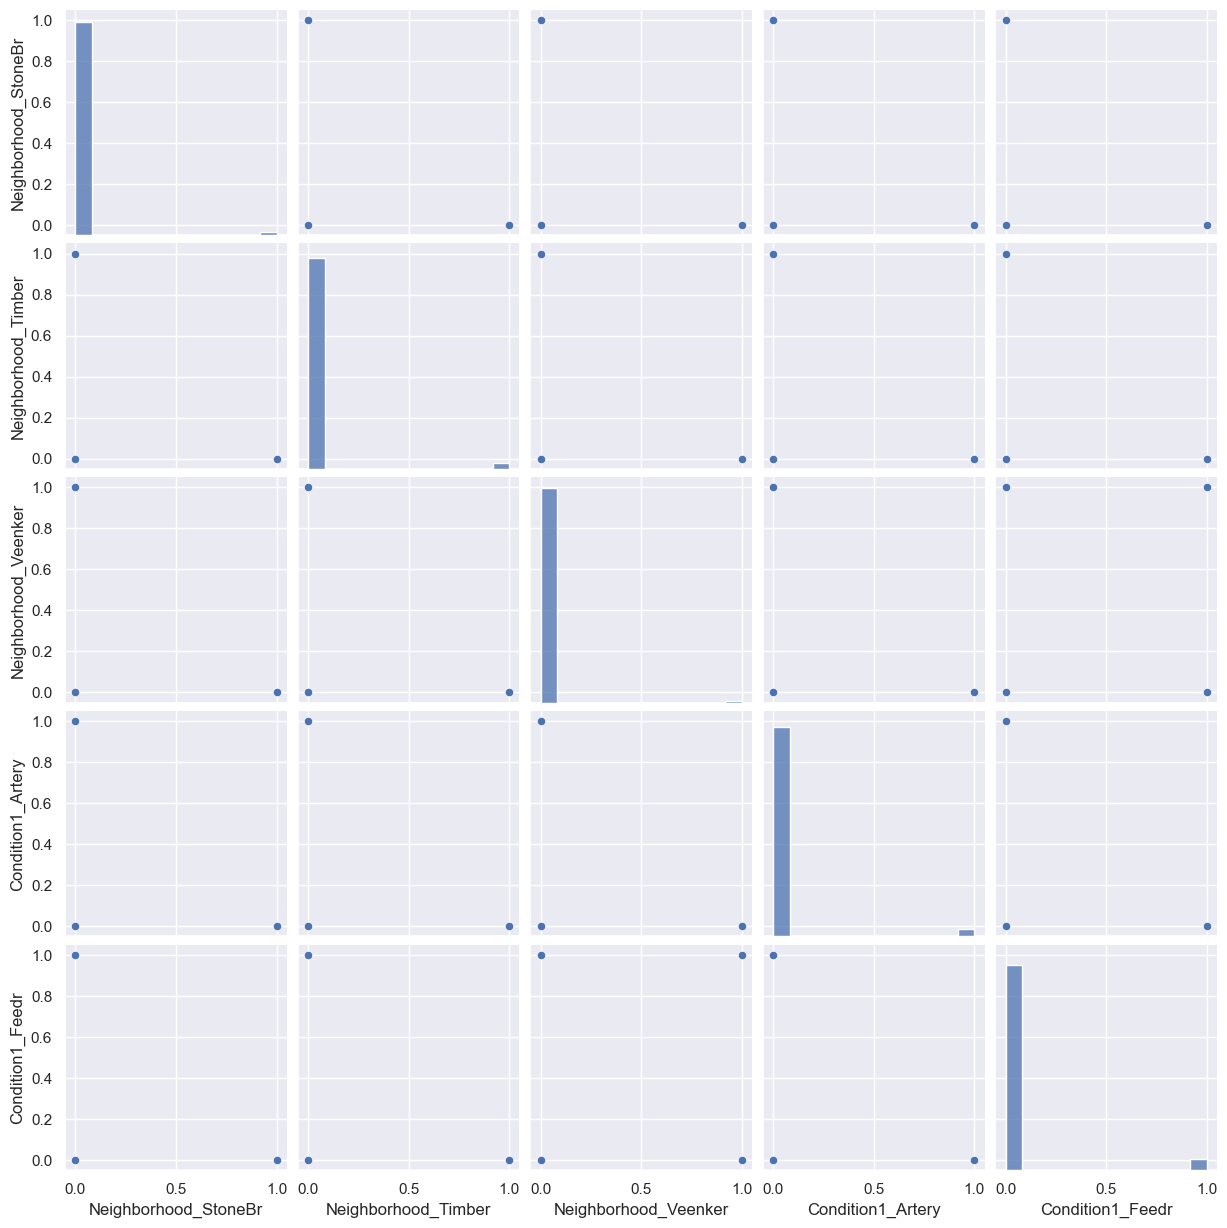

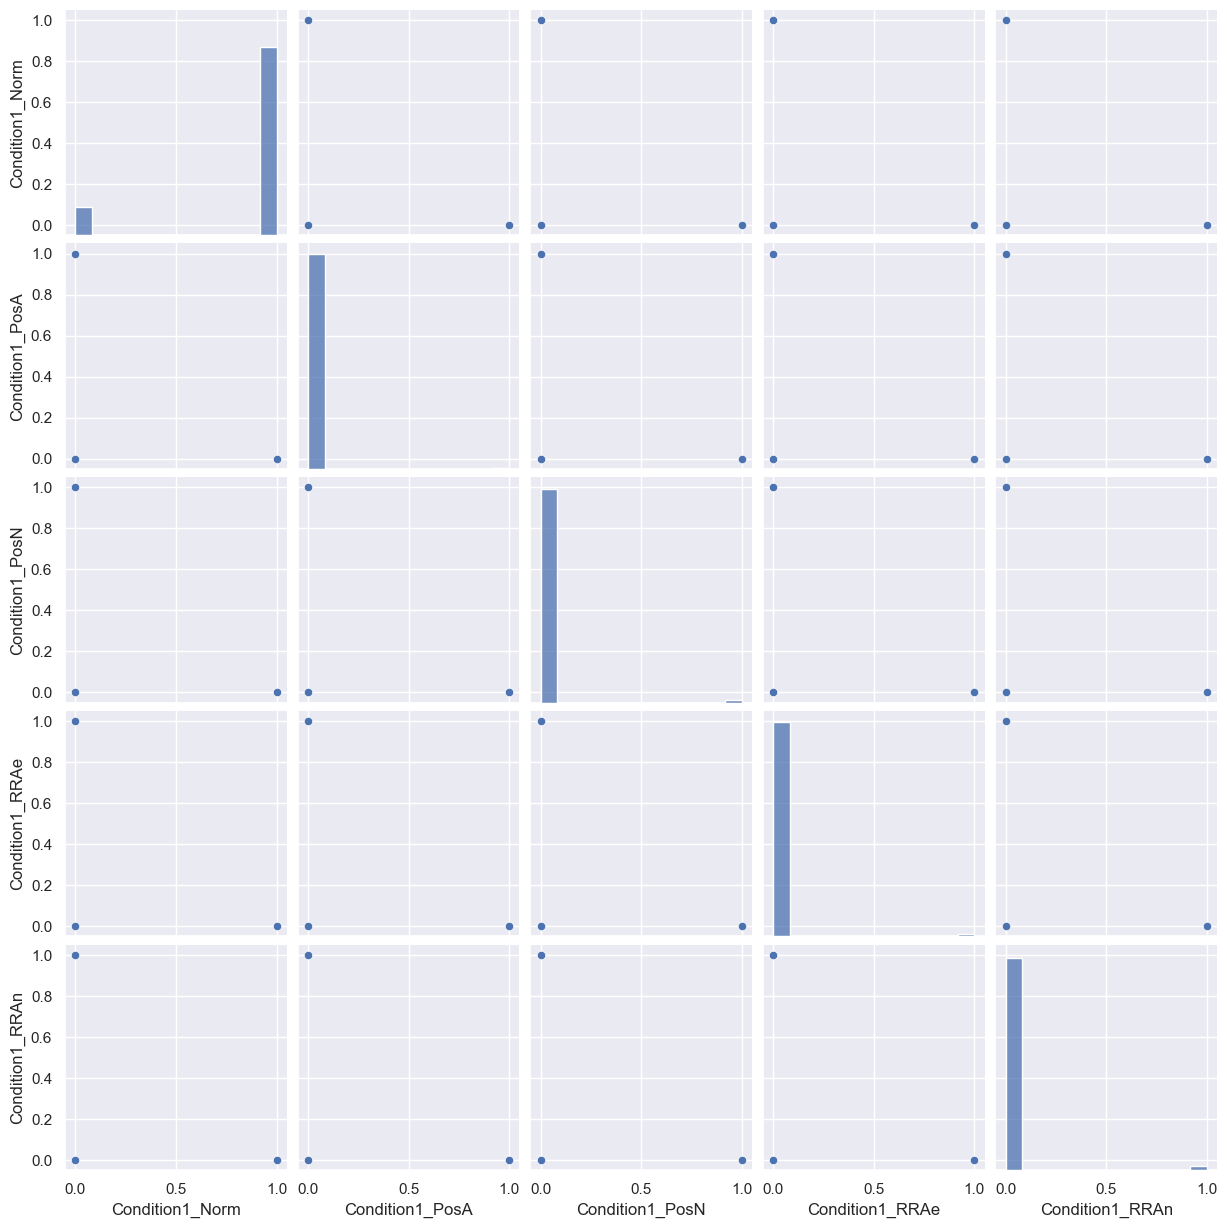

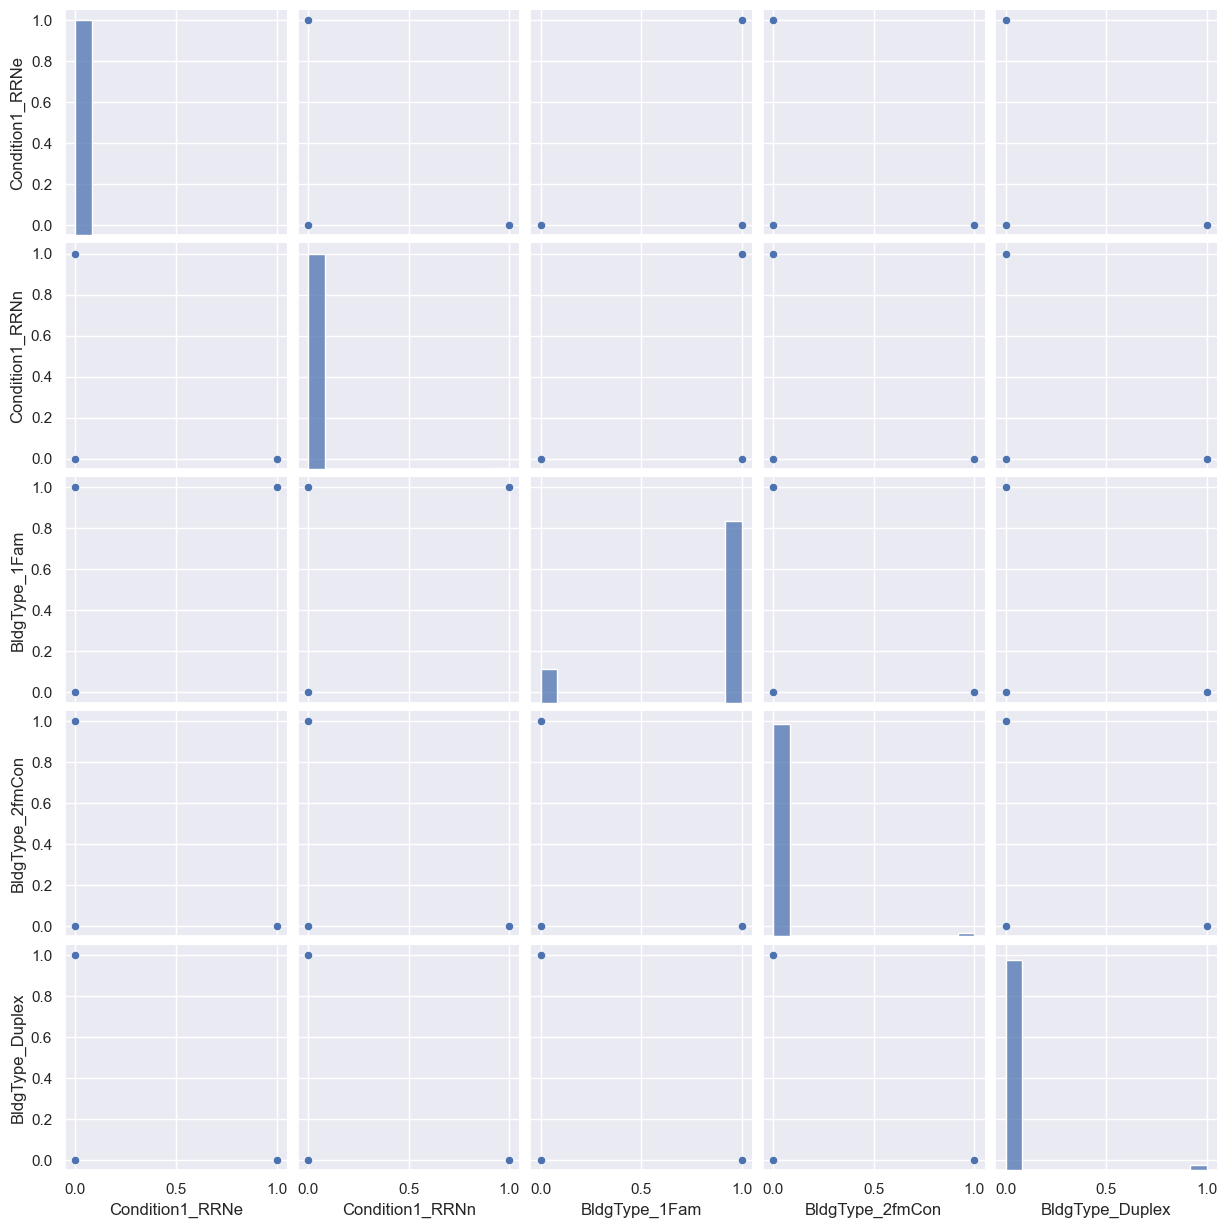

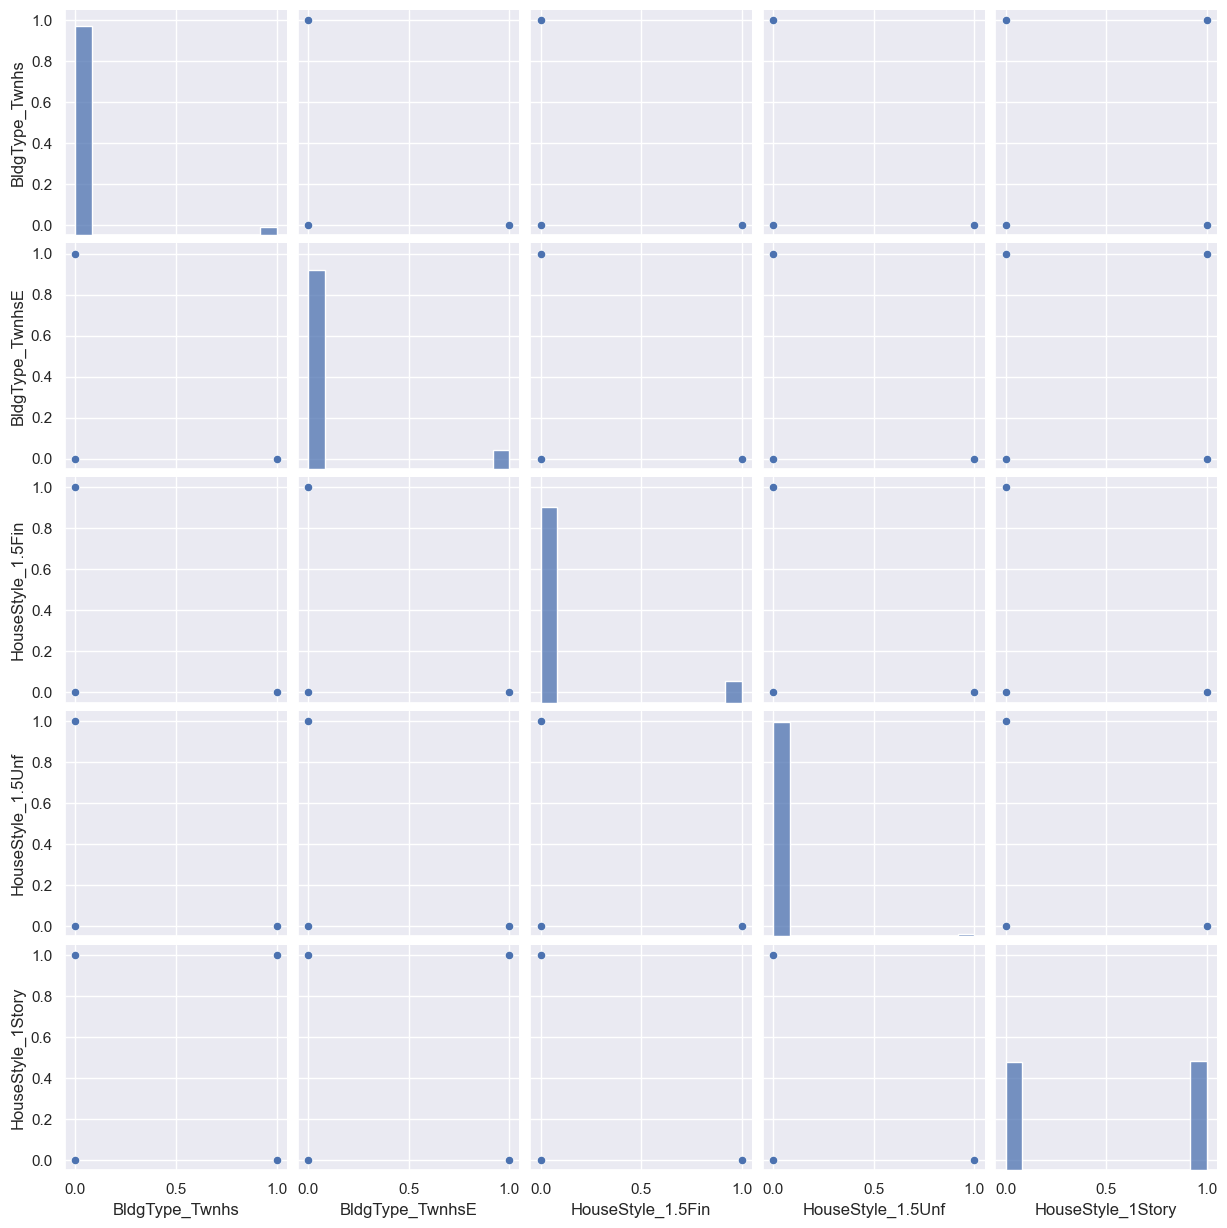

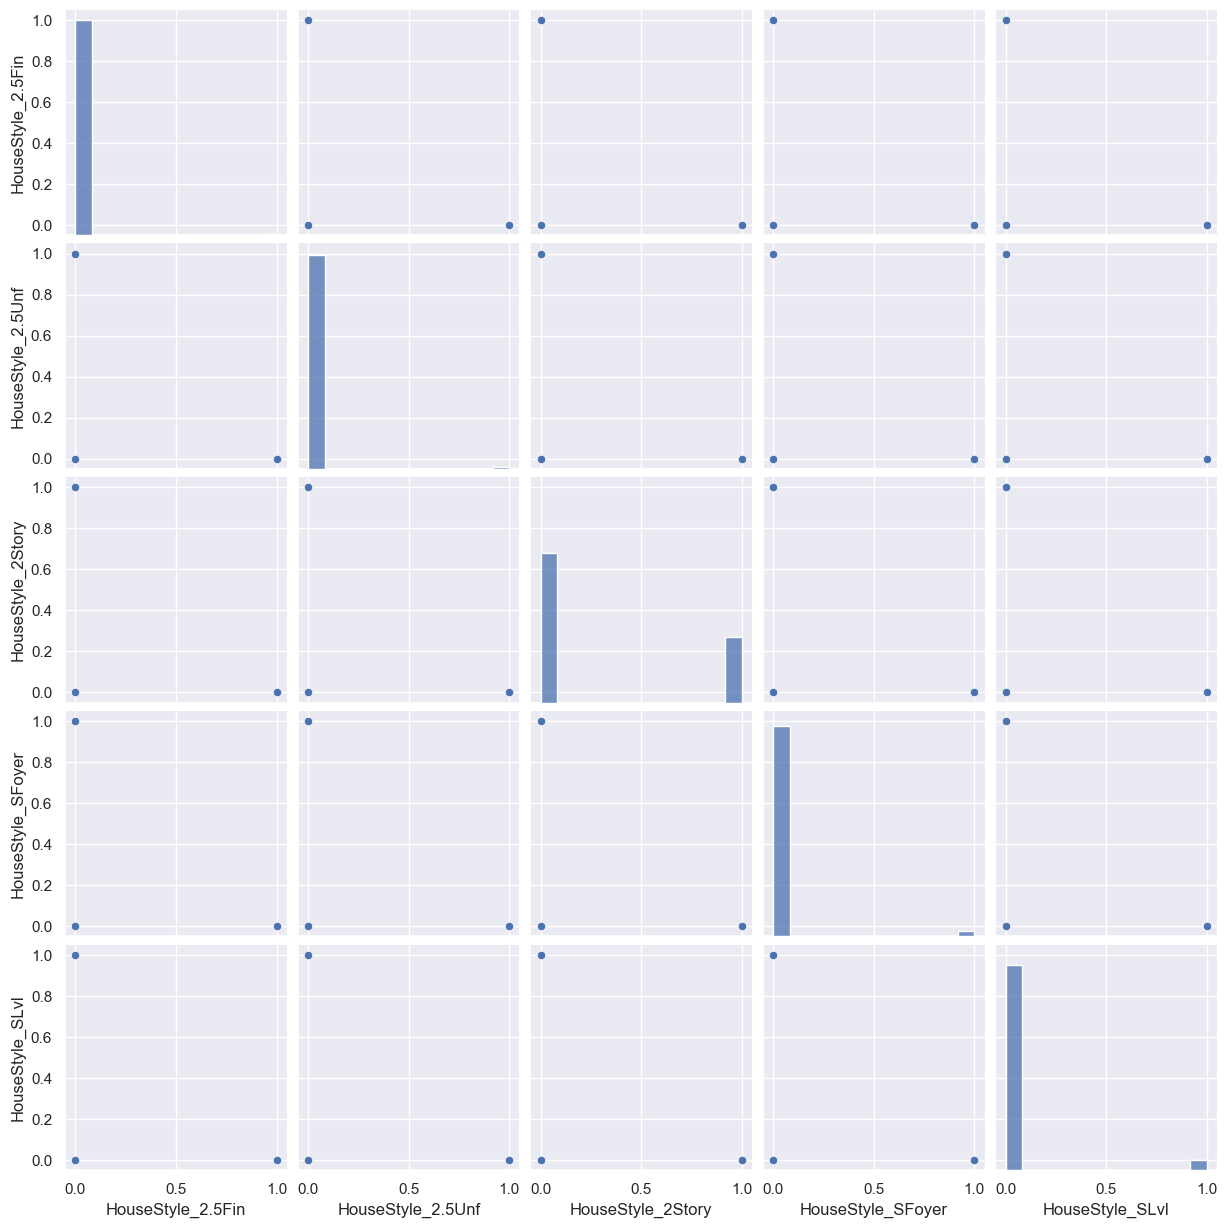

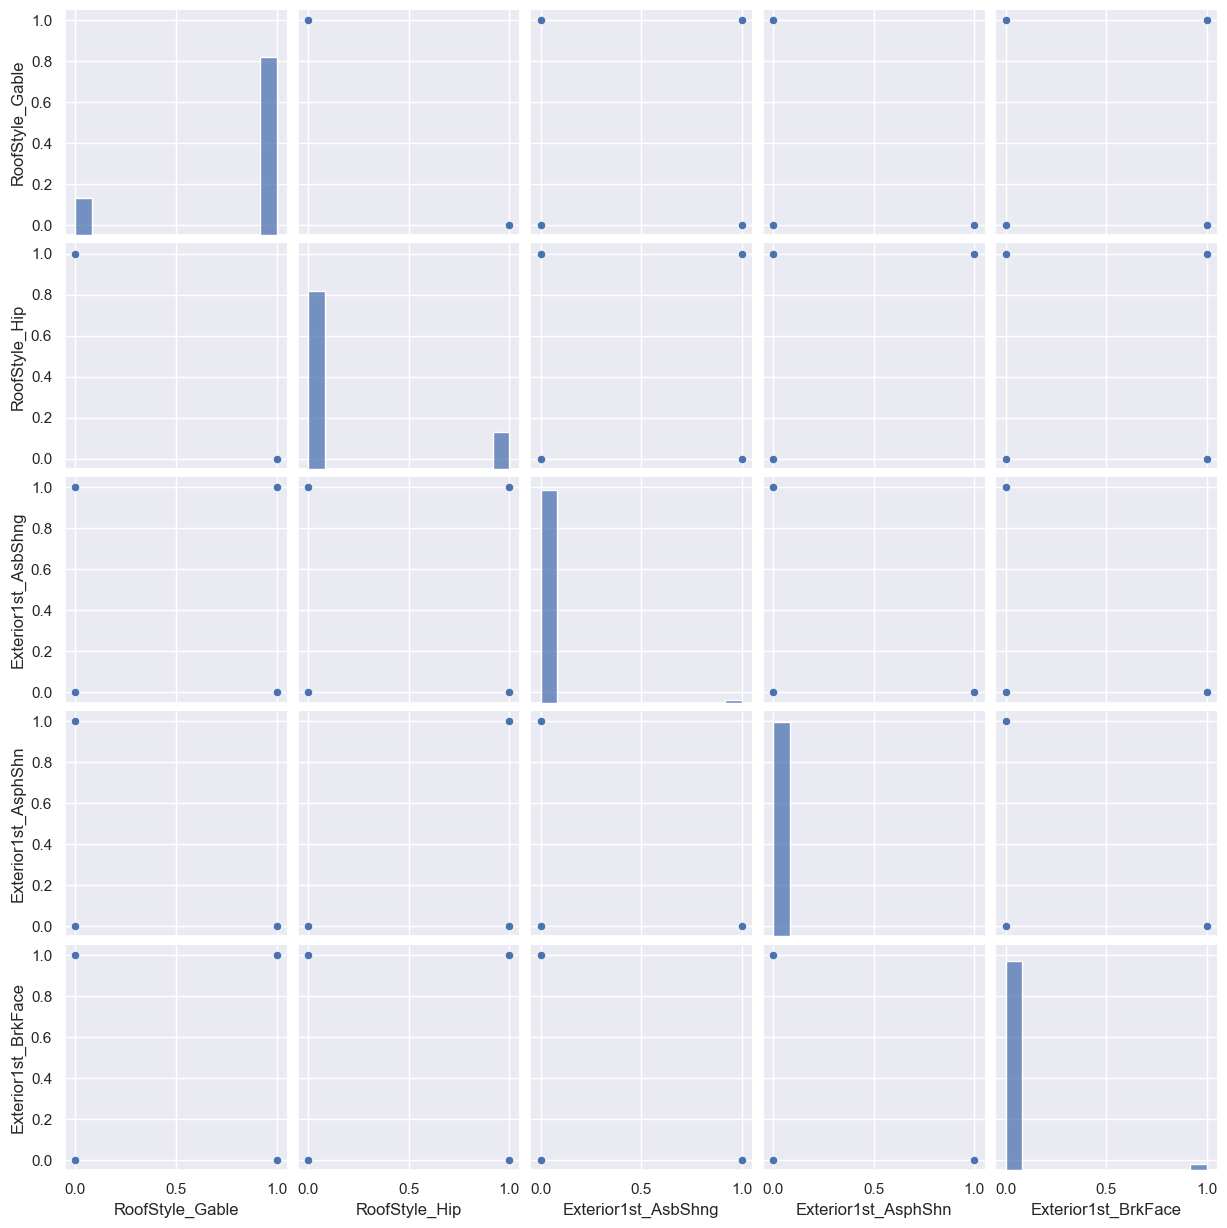

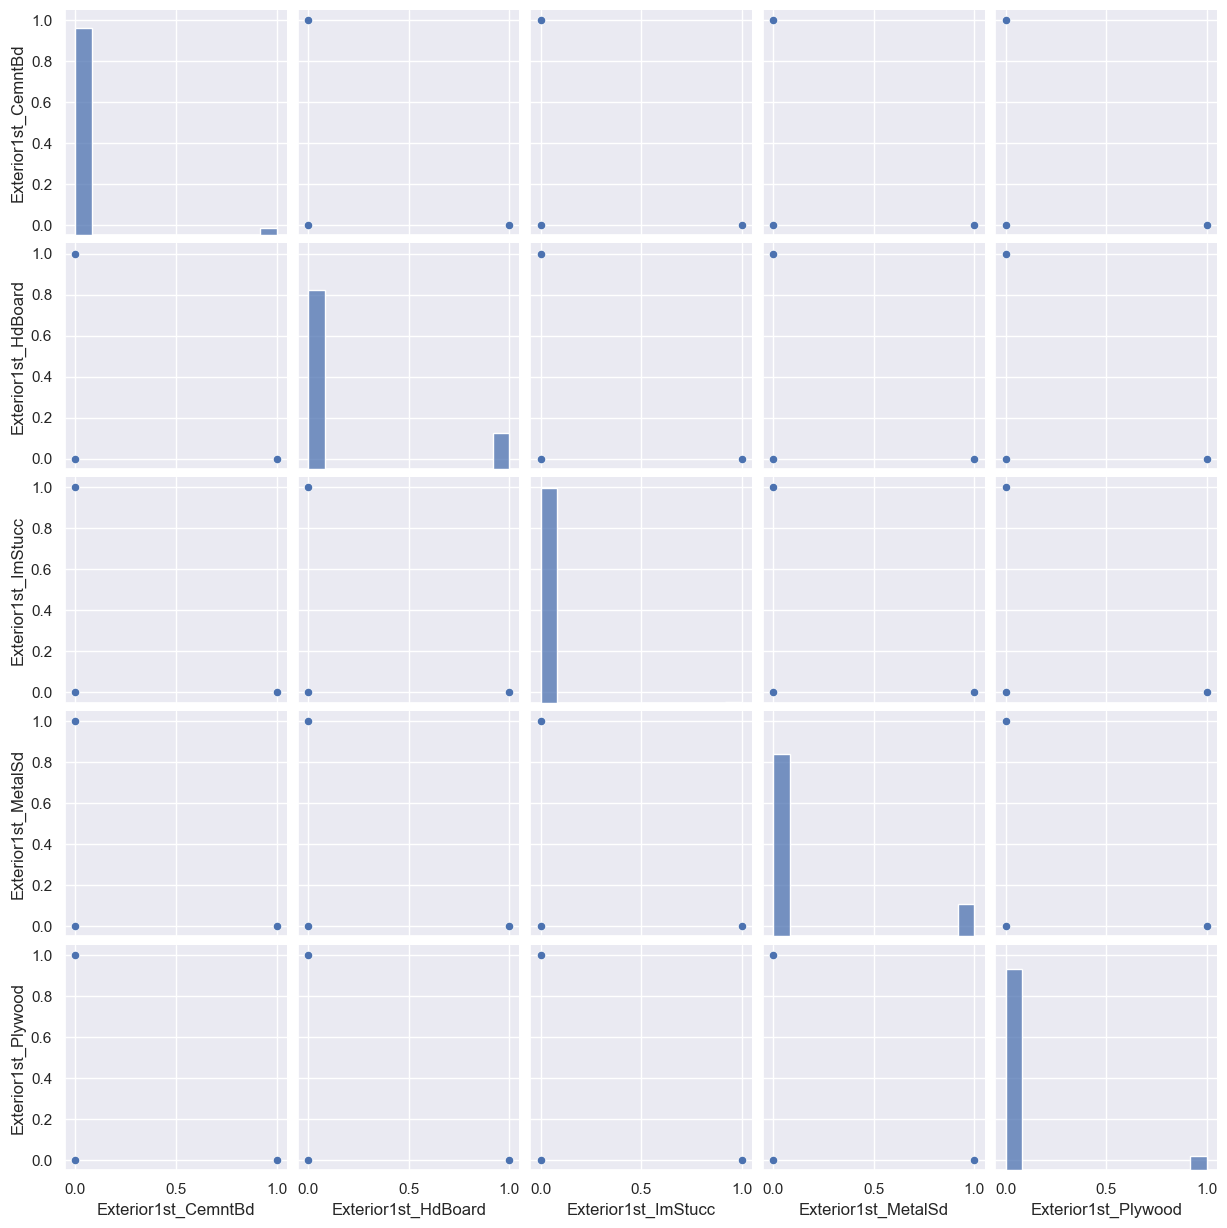

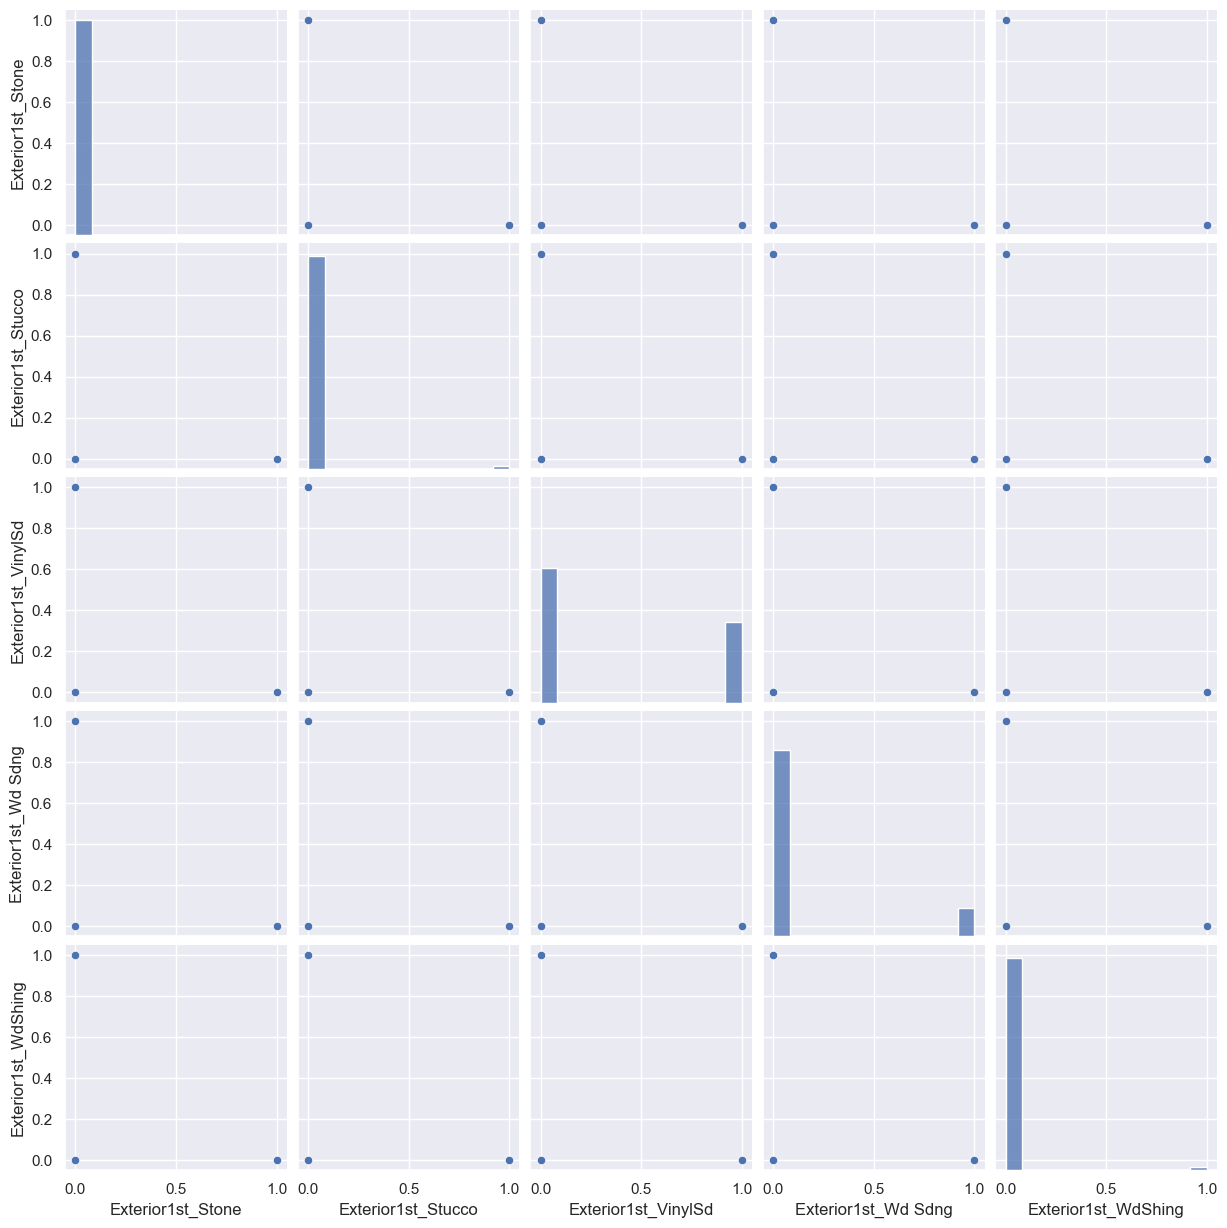

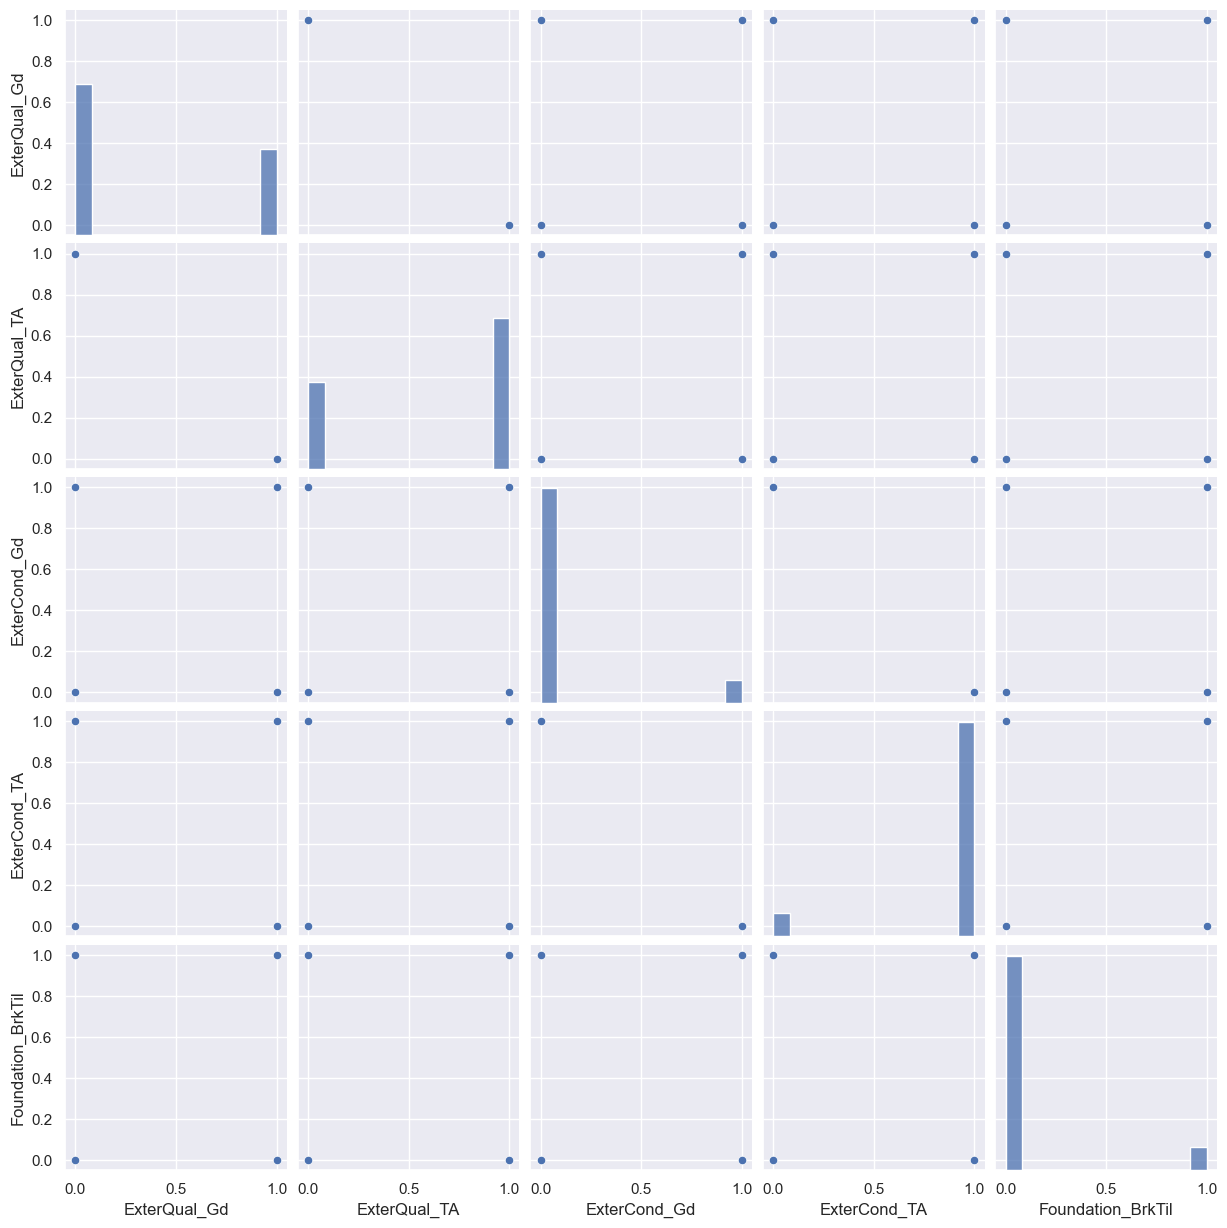

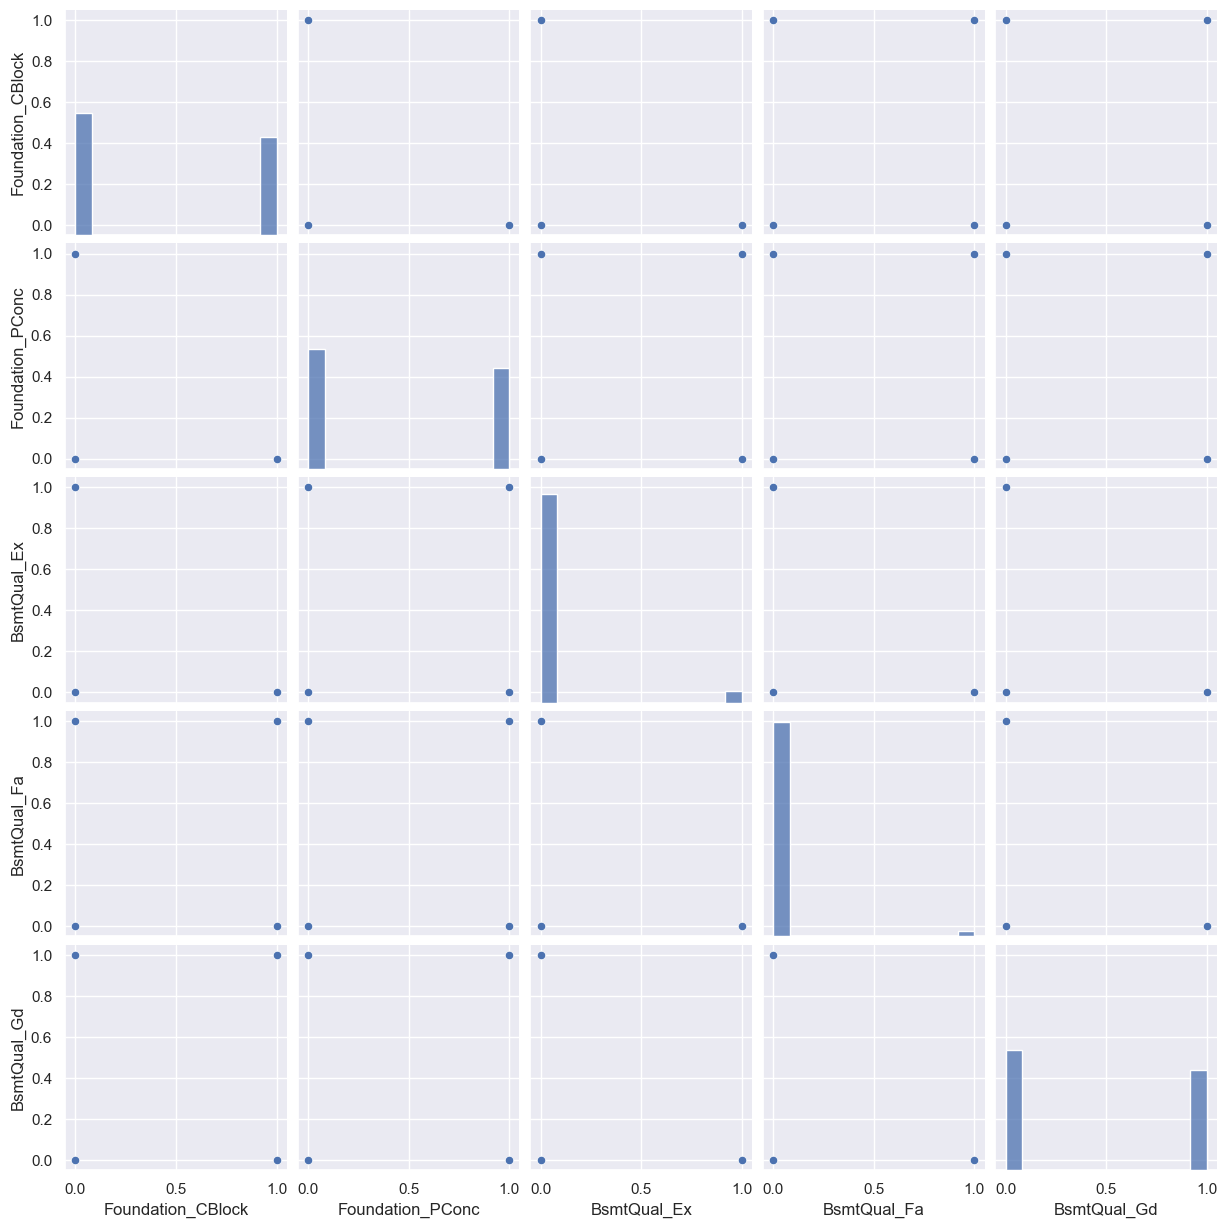

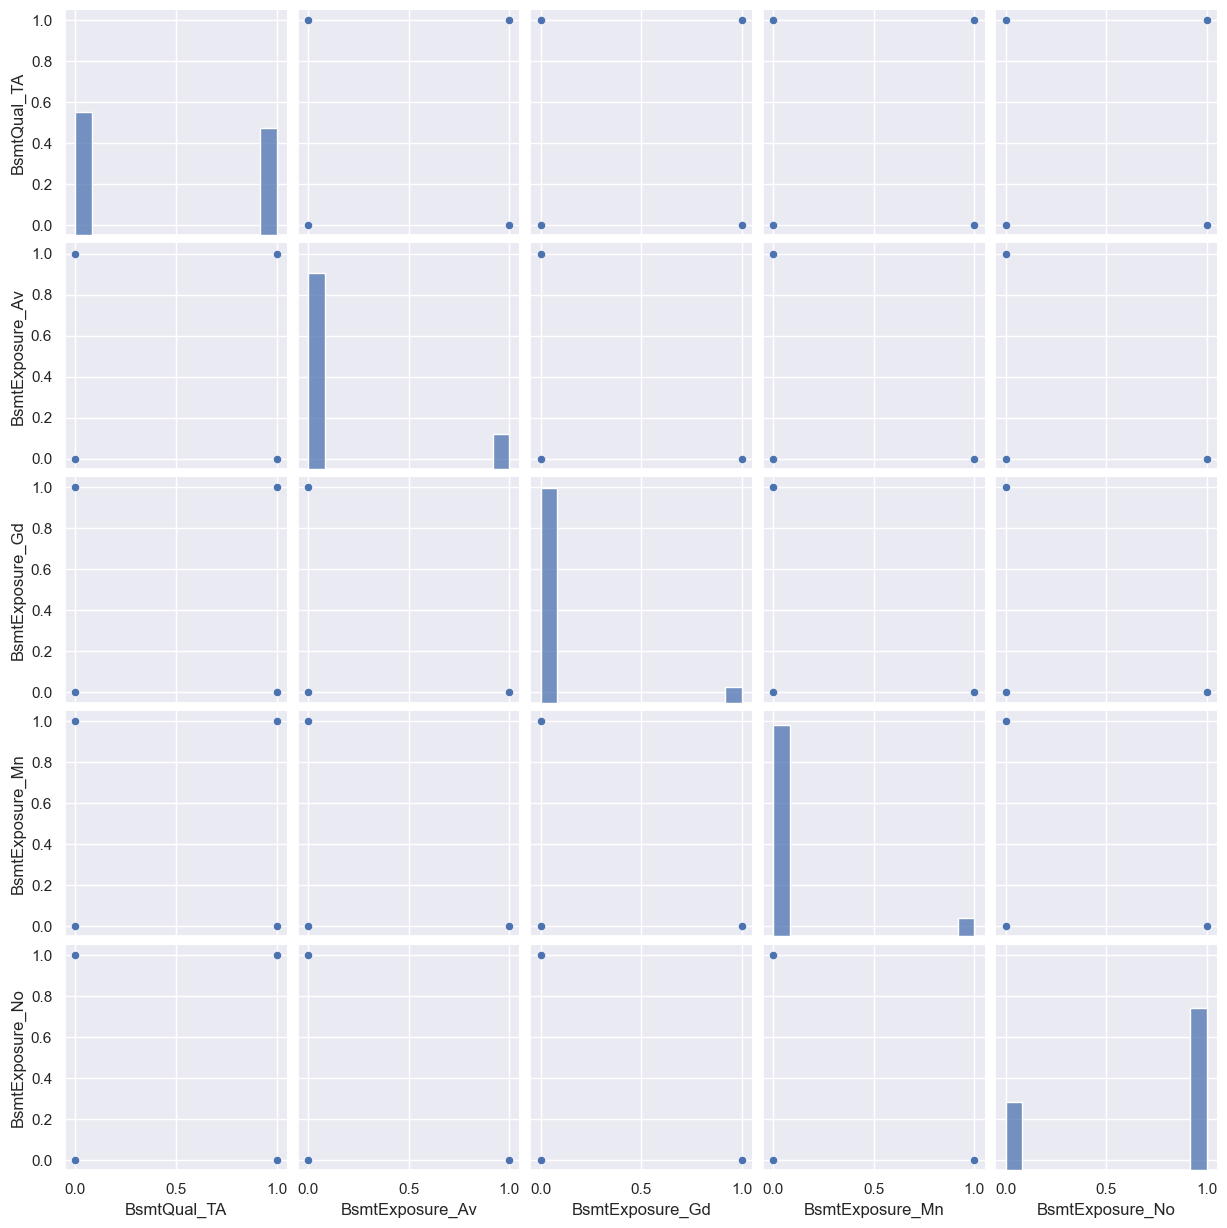

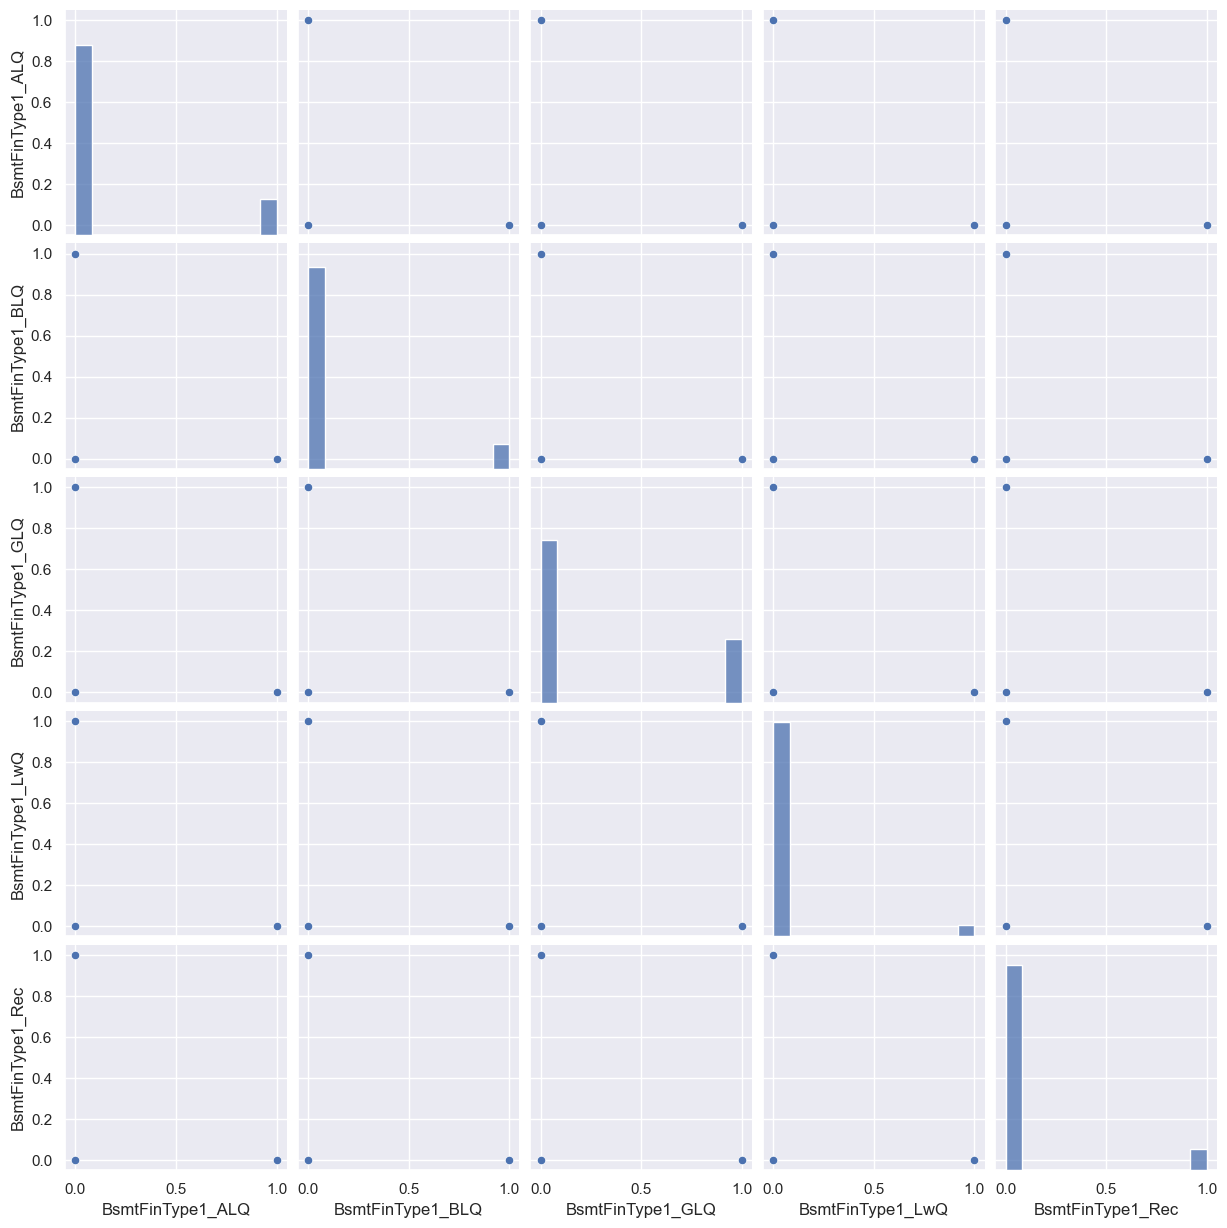

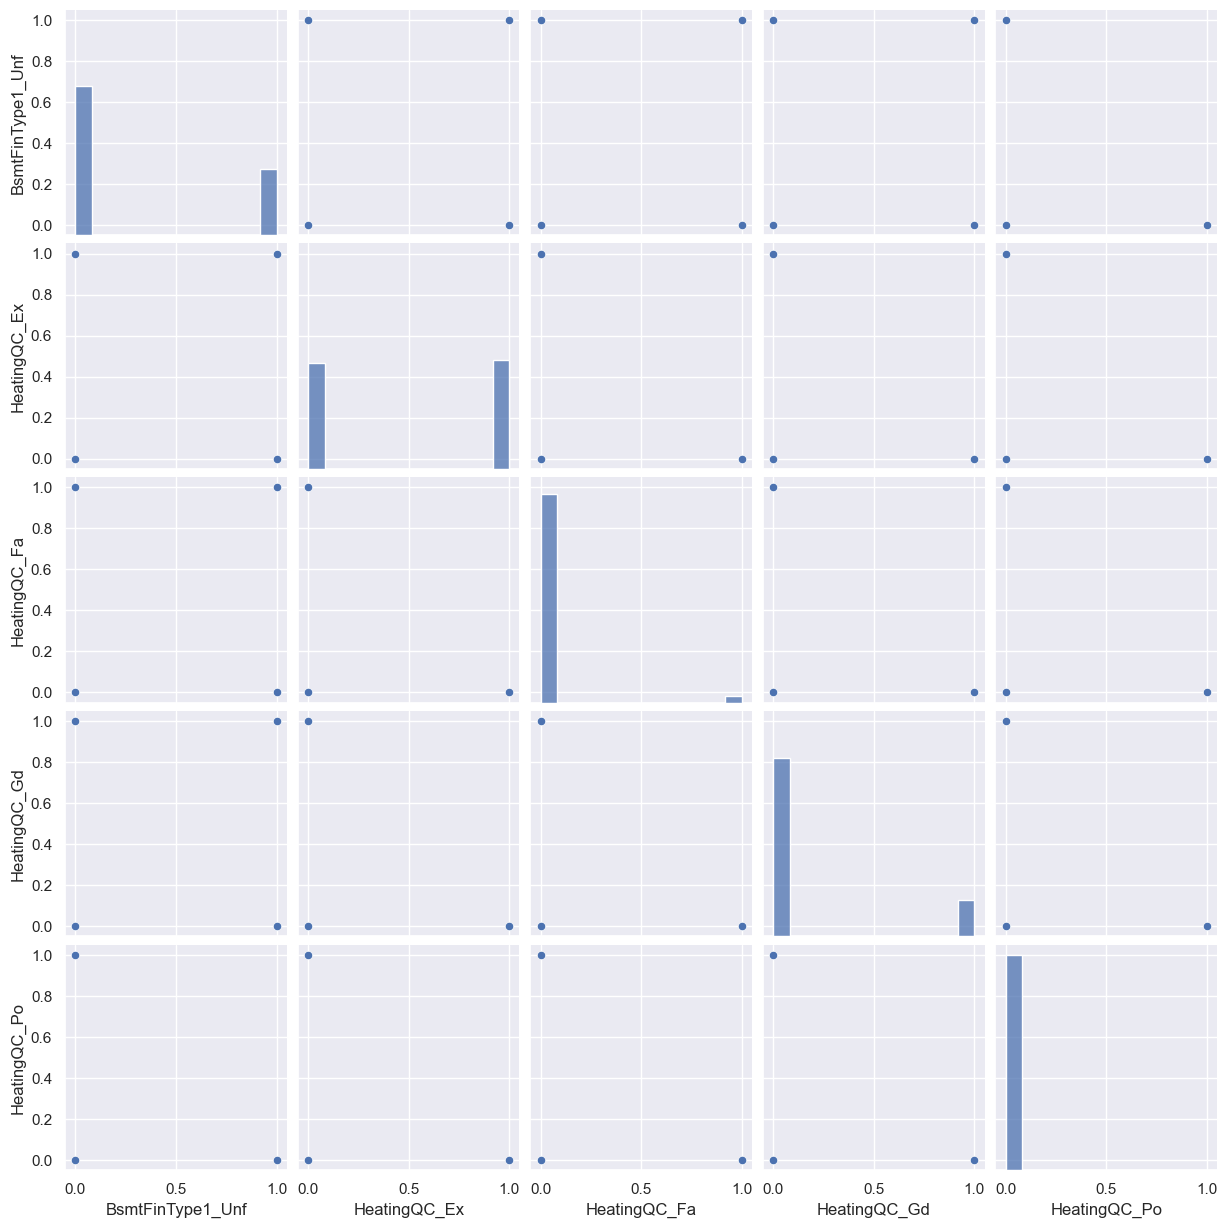

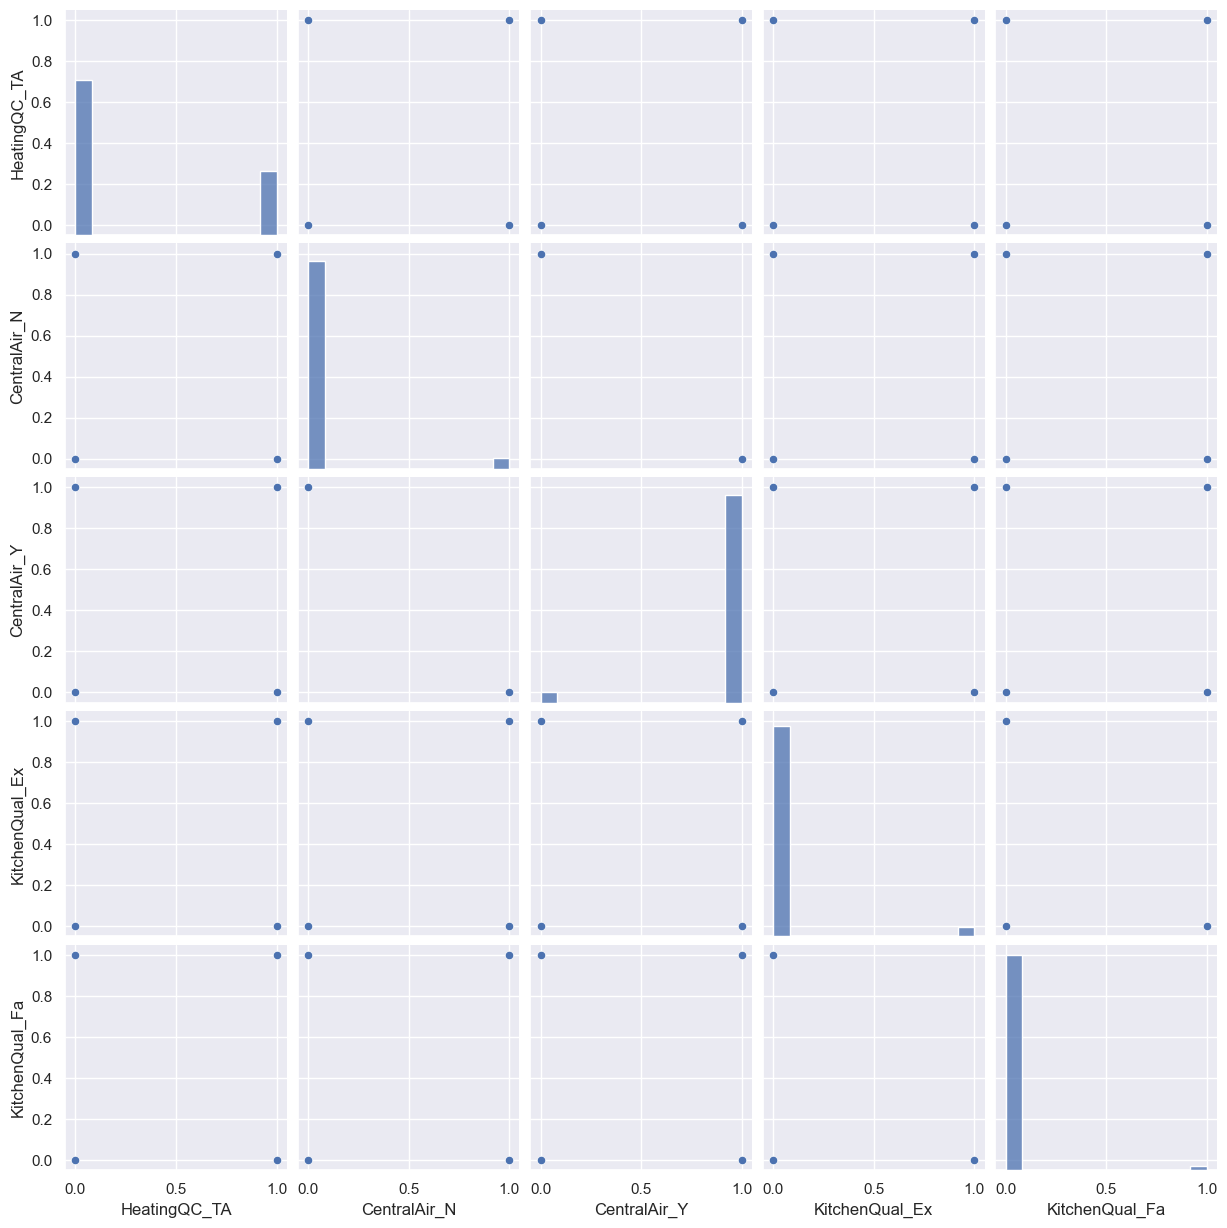

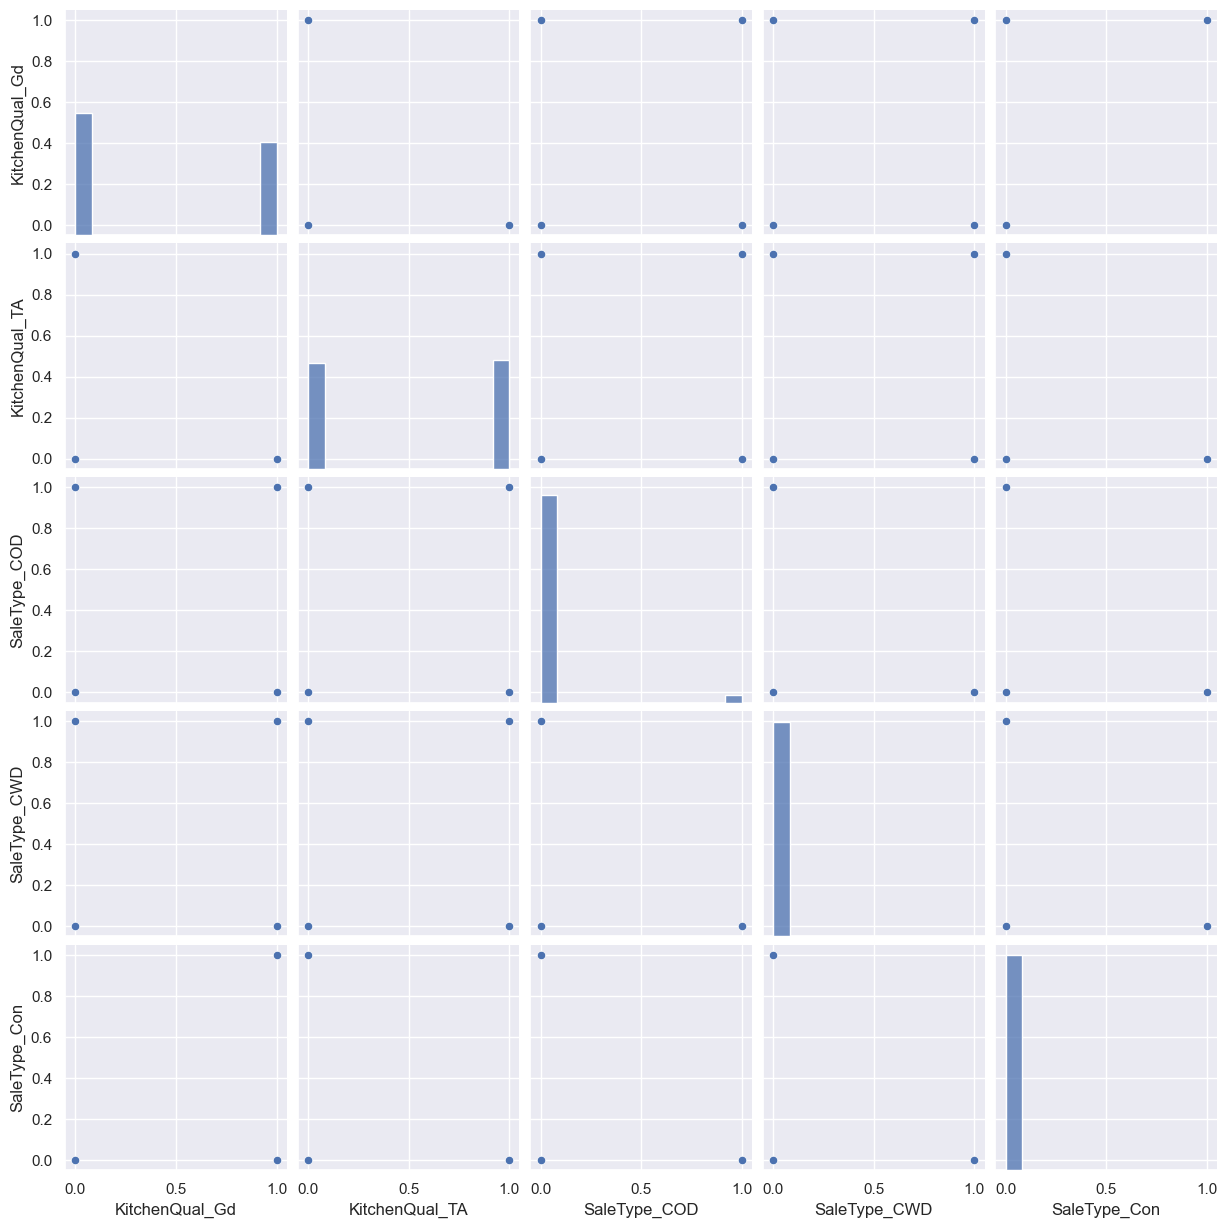

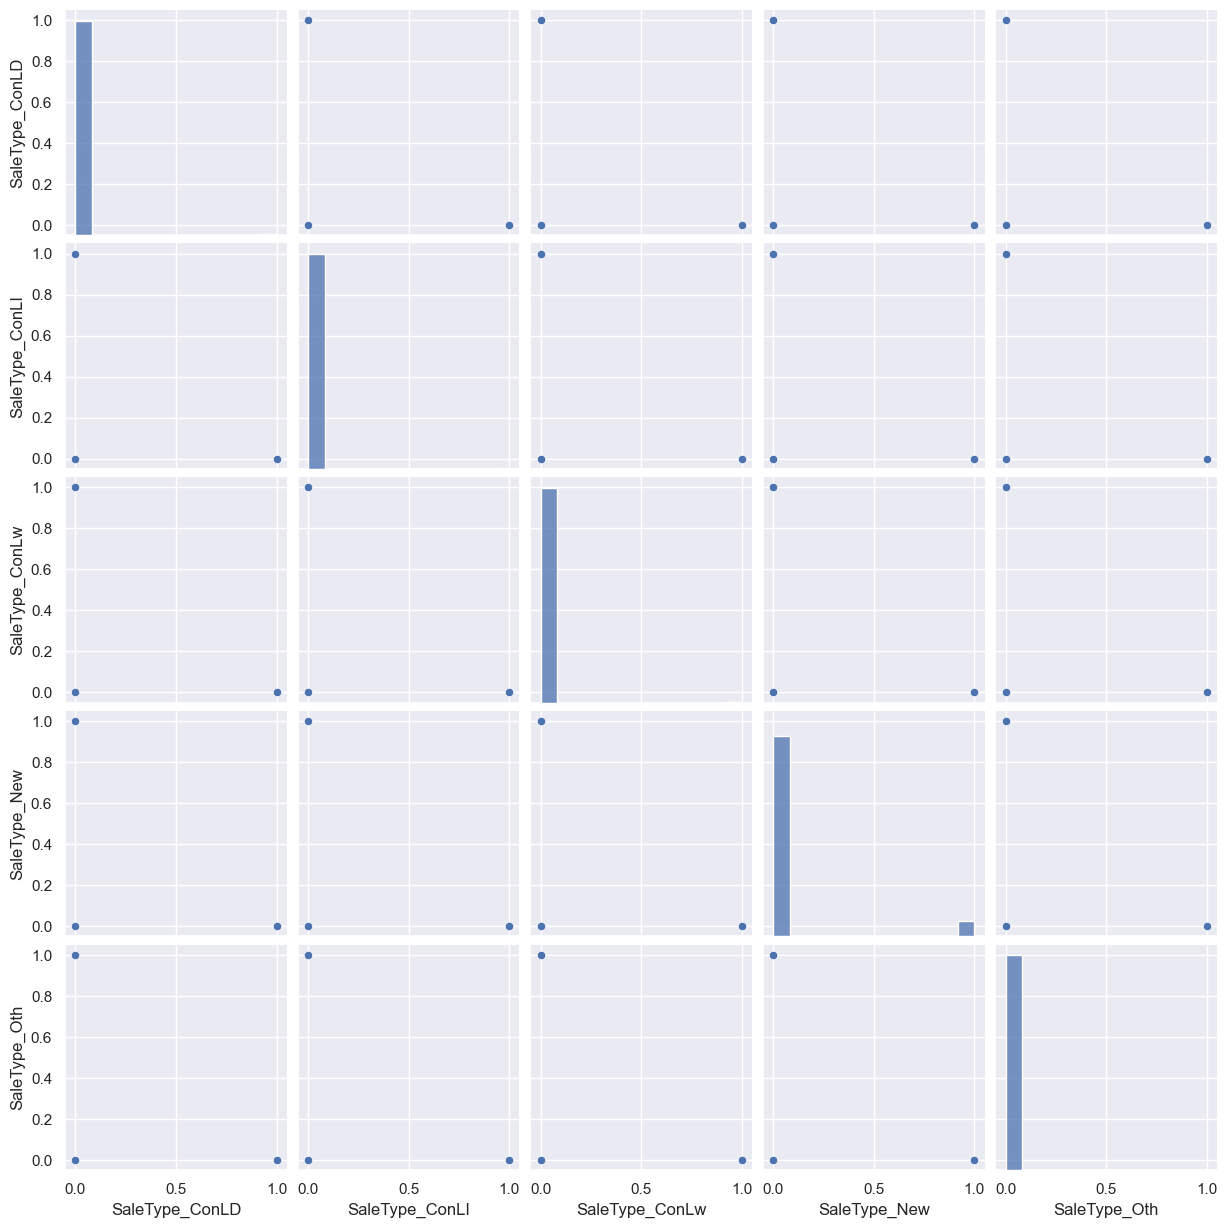

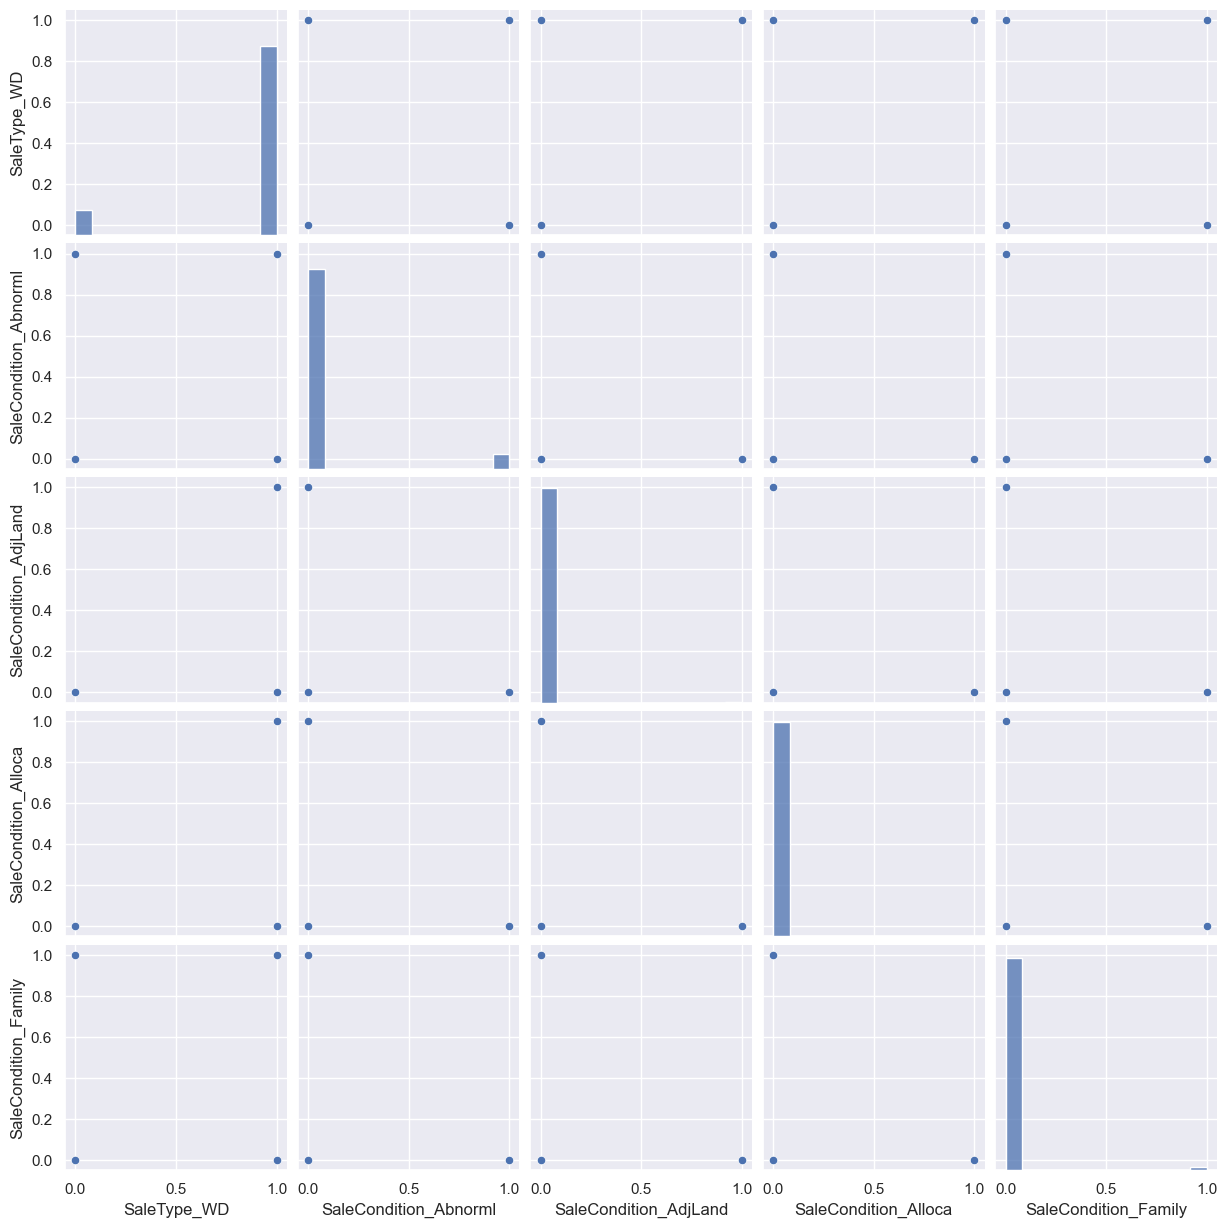

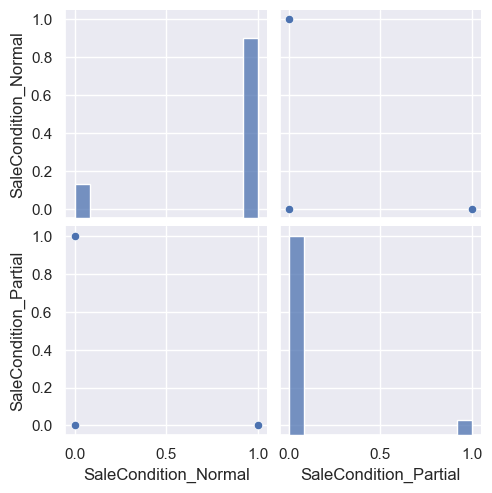

In [397]:
# # Plots
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]


cols = dataset.columns
for x in chunks(cols, 5):
    sns.pairplot(dataset, y_vars=x, x_vars=x)

In [357]:
# # corr = dataset.corrwith(dataset['GarageArea']).to_frame()
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()
# CORRELATION

In [358]:
# dataset.SalePrice = np.log1p(dataset.SalePrice)


In [359]:
# Remove Nulls Test
test.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
           'Fence', 'MiscFeature', 'GarageType', 'GarageFinish'], axis=1, inplace=True)
# for x in range(0, test.shape[1]):
#     col = test.columns[x]
#     if (test[col].dtype == object):
#         test[col] = test[col].fillna(test[col].mode()[0])
#     else:
#         test[col] = test[col].fillna(test[col].mean())

for i, column in enumerate(test):
    if (test[column].dtype == object):
        test[column] = test[column].fillna(test[column].mode()[0])
    else:
        test[column] = test[column].fillna(test[column].mean())


In [360]:
# Drop Highly Corr Test
test.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
           'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)


In [361]:
# Drop Low Corr Test
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
         "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
         "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
         "YrSold"]
test = test.drop(drops, axis=1)


In [362]:
# Not Important Test
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
         "GarageQual", "GarageCond", "PavedDrive",
         "PoolArea"]
test = test.drop(drops, axis=1)


In [363]:
# Transform To Object Test
# for x in range(0, test.shape[1]):
#         if (test[test.columns[x]].dtype == object):
#             le = preprocessing.LabelEncoder()
#             le.fit(test[test.columns[x]])
#             test[test.columns[x]] = le.transform(
#                 test[test.columns[x]])
test = pd.get_dummies(test)
test_id = test.Id



In [364]:
# Conversion to binary columns
test['EnclosedPorch'] = test['EnclosedPorch'].apply(lambda x: 1 if x>0 else 0)
test['ScreenPorch'] = test['ScreenPorch'].apply(lambda x: 1 if x>0 else 0)

In [365]:
# Match columns train test
cols = dataset.columns.tolist()
test = test.reindex(columns=cols).fillna(0)


In [366]:
# Scale Data
# dataset = np.log1p(dataset)


# test.BsmtFinSF1 = np.log1p(test.BsmtFinSF1)
# test.BsmtUnfSF = np.log1p(test.BsmtUnfSF)
# test.TotalBsmtSF = np.log1p(test.TotalBsmtSF)
# test.GarageArea = np.log1p(test.GarageArea)
# test.GrLivArea = np.log1p(test.GrLivArea)
# test.LotArea = np.log1p(test.LotArea)
# test.MasVnrArea = np.log1p(test.MasVnrArea)
# test.OpenPorchSF = np.log1p(test.OpenPorchSF)
# test.EnclosedPorch = np.log1p(test.EnclosedPorch)
# test.WoodDeckSF = np.log1p(test.WoodDeckSF)

test['LotArea'] = np.log1p(test['LotArea'])
test.MasVnrArea = np.log1p(test.MasVnrArea)
test.BsmtFinSF1 = np.log1p(test.BsmtFinSF1)
test.BsmtUnfSF = np.log1p(test.BsmtUnfSF)
test.TotalBsmtSF = np.log1p(test.TotalBsmtSF)
test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
test.GrLivArea = np.log1p(test.GrLivArea)
test.GarageArea = np.log1p(test.GarageArea)
test.WoodDeckSF = np.log1p(test.WoodDeckSF)
test.OpenPorchSF = np.log1p(test.OpenPorchSF)

# for coll in test.columns:
#     if test[coll].all(lambda x: x==0 or x==1) or test[coll].name == 'Id':
#         continue
#     else:
#         test[coll] = np.log1p(test[coll])

# test = np.log1p(test.iloc[:, ~test.columns.isin(['Id'])])


In [367]:
print(dataset.shape)


(1222, 142)


best combination (ACC: 0.956): (0, 2, 3, 6, 8, 10, 13, 16, 17, 33, 35, 37, 55, 75, 76, 81, 82, 88, 89, 91, 92, 111, 121, 126, 138)



(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

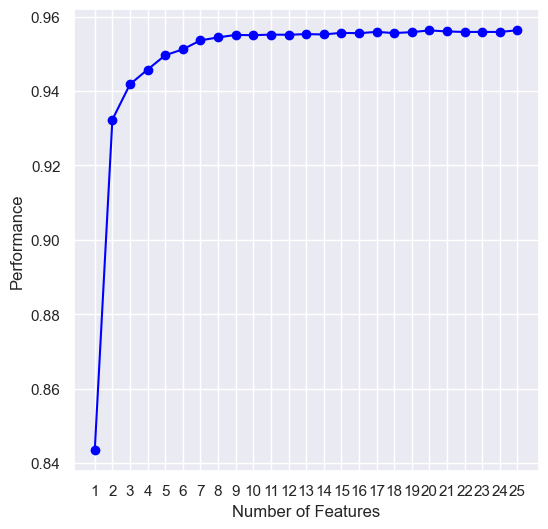

In [368]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

array = dataset.values
testarray = test.values
n = dataset.shape[1]
n = n-1

test_X = testarray[:, 0:n]  # features
X = array[:, 0:n]  # features
Y = array[:, n]  # target

XX = dataset.iloc[:, ~dataset.columns.isin(['Id', 'SalePrice'])]
YY = dataset[['SalePrice']]


def mrse(y_true, y_pred):
    return 1 - np.sqrt(mean_squared_error(y_true, y_pred))


scorer = make_scorer(mrse, greater_is_better=True)


rfr = RandomForestRegressor()

sfs_range = SFS(estimator=rfr,
                k_features=(18, 25),
                forward=True,
                floating=False,
                scoring=scorer,
                cv=0, n_jobs=8)

sfs_range.fit(XX, YY)

# print the accuracy of the best combination as well as the set of best features
print('best combination (ACC: %.3f): %s\n' %
      (sfs_range.k_score_, sfs_range.k_feature_idx_))

plt.rcParams["figure.figsize"] = (6, 6)
# use the plot_sfs to visualize all accuracies
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')


In [369]:
XX

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,5,2003,2003,5.283204,6.561031,5.017280,6.753438,6.751101,7.444833,1,2,1,3,1,0,6.308098,0.000000,4.127134,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,8,1976,1976,0.000000,6.886532,5.652489,7.141245,0.000000,7.141245,0,2,0,3,1,1,6.133398,5.700444,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,5,2001,2002,5.093750,6.188264,6.075346,6.825460,6.765039,7.488294,1,2,1,3,1,1,6.411818,0.000000,3.761200,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,5,1915,1970,0.000000,5.379897,6.293419,6.629363,6.629363,7.448916,1,1,0,3,1,1,6.466145,0.000000,3.583519,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,5,2000,2000,5.860786,6.486161,6.196444,7.044033,6.960348,7.695758,1,2,1,4,1,1,6.729824,5.262690,4.442651,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,

In [370]:
X_sfs = sfs_range.transform(XX)
x_train, x_test, y_train, y_test = train_test_split(
    X_sfs, YY, test_size=0.2, random_state=203)  # test = 40%, train = 60%


In [371]:
print("\nElasticNet")
ens_test = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.0015, 0.01, 0.015, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                     l1_ratio=[0.01, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], max_iter=10000).fit(x_train, y_train)
ens_result = ens_test.predict(x_test)
print('\tR2: {}'.format(r2_score(ens_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ens_result, y_test))))
scores = cross_val_score(ens_test, XX, YY, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



ElasticNet
	R2: 0.8317742570987439
	RMSE: 0.12330553831662892
	Accuracy: 0.91 (+/- 0.02)


In [372]:
print("\nXgBoost")
xg_reg = xgb.XGBRegressor(objective='reg:linear', eval_metric='logloss',
                          scoring='neg_mean_squared_error', subsample=0.95, colsample_bytree=0.3, learning_rate=0.04,
                          max_depth=2, alpha=0.1, n_estimators=1000,)
xg_reg.fit(x_train, y_train)
preds = xg_reg.predict(x_test)
scores = cross_val_score(xg_reg, XX, YY, cv=5)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



XgBoost
[13:07:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:07:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scoring" } are not used.

[13:07:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\

In [373]:
print("\nGradientBoostingRegressor")
g_best = ensemble.GradientBoostingRegressor(n_estimators=1850, random_state=1234, learning_rate=0.02, max_depth=3,
                                            max_features='log2', min_samples_leaf=11, min_samples_split=15, loss='huber').fit(x_train, y_train)
g_best_result = g_best.predict(x_test)
print('\tR2: {}'.format(r2_score(g_best_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(g_best_result, y_test))))
scores = cross_val_score(g_best, XX, YY, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



GradientBoostingRegressor
	R2: 0.8794741854266342
	RMSE: 0.10681420124269102
	Accuracy: 0.91 (+/- 0.03)


In [374]:
print("\nLinearRegression")
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr_result = lr.predict(x_test)
print('\tR2: {}'.format(r2_score(lr_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lr_result, y_test))))
scores = cross_val_score(lr, XX, YY, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



LinearRegression
	R2: 0.8328482605795486
	RMSE: 0.12390340463402809
	Accuracy: -430399621689743232.00 (+/- 1721598486758972928.00)


In [375]:
print("\nRidge Regression")
ridge = Ridge(max_iter=50000)
ridge_est = GridSearchCV(
    ridge, param_grid={"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
ridge_est.fit(x_train, y_train)
ridge_result = ridge_est.predict(x_test)
print('\tR2: {}'.format(r2_score(ridge_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ridge_result, y_test))))
scores = cross_val_score(ridge_est, XX, YY, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Ridge Regression
	R2: 0.8318207771858155
	RMSE: 0.12354571341787464
	Accuracy: 0.90 (+/- 0.03)


In [376]:
print("\nLasso Regression")
lasso = Lasso(max_iter=50000)
lasso_est = GridSearchCV(
    lasso, param_grid={"alpha": np.arange(0.0005, 0.001, 0.00001)})
lasso_est.fit(x_train, y_train)
lasso_result = lasso_est.predict(x_test)
print('\tR2: {}'.format(r2_score(lasso_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lasso_result, y_test))))
scores = cross_val_score(lasso_est, XX, YY, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Lasso Regression
	R2: 0.831873090489943
	RMSE: 0.12315080084970009
	Accuracy: 0.91 (+/- 0.02)


In [377]:
result = np.exp(g_best.predict(test.iloc[:, [0, 2, 3, 6, 8, 10, 13, 16, 17, 33, 35, 37, 55, 75, 76, 81, 82, 88, 89, 91, 92, 111, 121, 126, 138]]))
output = pd.DataFrame({'Id': test_id, 'SalePrice': result})
print(output)
output.to_csv('submission.csv', index=False)


        Id     SalePrice
0     1461  67539.516534
1     1462  77033.553687
2     1463  67494.049839
3     1464  70890.252361
4     1465  98678.165859
...    ...           ...
1454  2915  63117.242602
1455  2916  62841.383881
1456  2917  67494.049839
1457  2918  70229.912994
1458  2919  95309.658740

[1459 rows x 2 columns]
